marziyeh mousavi
810101526

## **PartA**

## **Policy Iteration**

Let us assume we have a policy (𝝅 : S → A ) that assigns an action to each state. Action 𝝅(s) will be chosen each time the system is at state s.

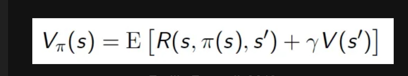

our discount is 0.9

This is the probablity for given action

an action done with 0.7 probablity and the other action may happen for 0.1 probablity

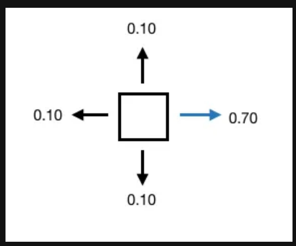

This is our field!

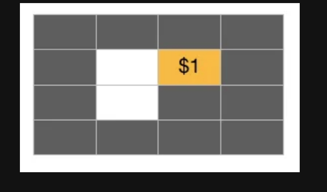

Value function = the expected reward collected at the first step + expected discounted value at the next state

2. Improve policy : find a better action for state s ∊ S

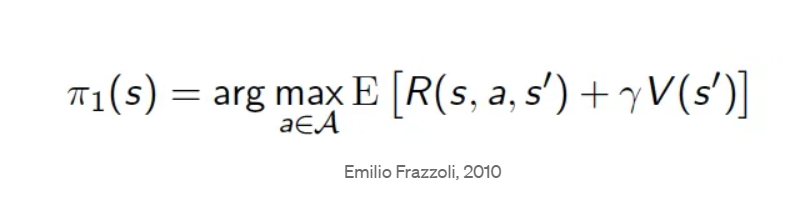

Repeat step 1,2 until value function converge to optimal value function


Start with a simple policy 𝝅 : Always go right

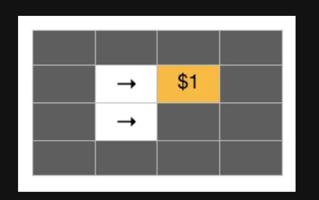

Calculate value function for a simple policy 𝝅

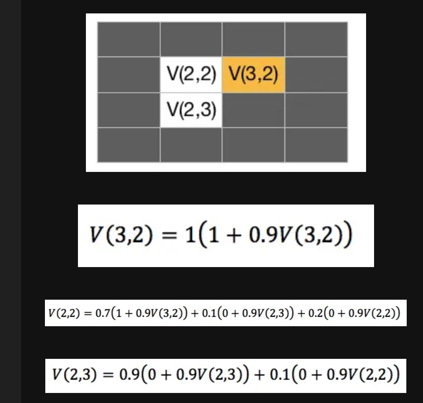

solving equation:

V(3,2) = 10

V(2,2) = 9

V(2,3) = 4.265

let's improve the policy!

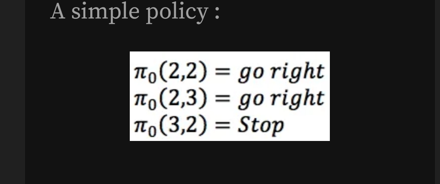

let's star with state (2,2)

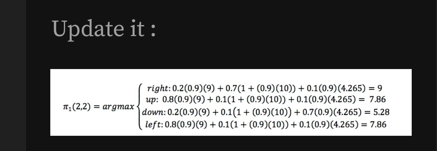

**Then** (2,3)

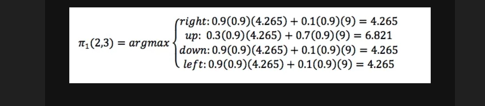

This is the policy when we choose the maximum reward!

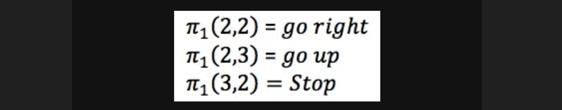

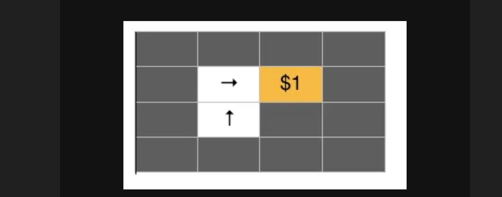

we repeat the procedure until we don't see a lot of change!

In [ ]:
def calculate_v_pi(rewards,probablity)

# **Code B**

In [ ]:
import random
import gym
import numpy as np
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from keras.optimizers import Adam
from IPython.display import HTML
import os


In [ ]:
env = gym.make('CartPole-v0') # initialise environment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns 

In [ ]:
state_size = env.observation_space.shape[0]
state_size

4

In [ ]:
action_size = env.action_space.n
action_size


2

In [ ]:
batch_size = 32

In [ ]:
n_episodes = 200

In [ ]:
output_dir = '/content/drive/MyDrive/AI-project3/'

In [ ]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

### train method

Experience Replay:
The train method samples a minibatch of experiences from the agent’s memory.
Each minibatch contains tuples of (state, action, reward, next_state, done).


Updating Q-Values:
For each minibatch sample:
If the episode is done (done is True), the target Q-value is simply the immediate reward (reward).
If the episode is not done (done is False), the target Q-value is updated using the Bellman equation.
The Q-value for the chosen action (action) is updated with the new target value.



Neural Network Update:
The neural network model (self.model) is then updated using the current state (state) and the adjusted target Q-value (target_f).
The model is trained for one epoch with the updated target Q-value.
Exploration Decay:
If the current exploration rate (epsilon) is greater than the minimum threshold (epsilon_min), the exploration rate is adjusted by multiplying it with the decay factor (epsilon_decay).

### act method:


Exploration vs. Exploitation:

The purpose of the act method is to decide whether the agent should explore (take a random action) or exploit (choose the best predicted action).
The exploration rate (epsilon) plays a crucial role here.


Exploration (Random Action):
If a random number between 0 and 1 is less than or equal to epsilon, the agent acts randomly.
In this case, it selects a random action from the available actions (e.g., left or right).


Exploitation (Predicted Action):
If the random number exceeds epsilon, the agent exploits its learned knowledge.
It predicts the Q-values for the current state using the neural network model (self.model.predict(state)).
The action with the highest predicted Q-value is chosen (using np.argmax(act_values[0])).


Balancing Exploration and Exploitation:
Initially, when epsilon is high (close to 1.0), the agent explores more (random actions).
As training progresses, epsilon decreases (due to epsilon_decay), leading to more exploitation (choosing optimal actions).


In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000) # deque is like list and we can append elements to it.
        self.gamma = 0.95 # discount rate.
        self.epsilon = 1.0 # exploration rate: how much to act randomly.
        self.epsilon_decay = 0.995 # decrease number of random explorations as the agent's performance improves.
        self.epsilon_min = 0.01 # minimum amount of random exploration permitted.
        self.learning_rate = 0.001 # learning rate.
        self.model = self._build_model() # This is a private method

    #==============================================================================================
    #Step 2

    def _build_model(self):
        # neural net to approximate Q-value function.# Q is a f of s,a,theta
        model = Sequential()
        model.add(Dense(32, activation='relu', input_dim=self.state_size))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(self.action_size, activation='linear')) # 2 actions. 2 output neurons: 0 and 1 (L/R)
        model.compile(loss='mse',
                      optimizer=Nadam(learning_rate=self.learning_rate)) # You can change this to Adam or other optimisers.
        return model

    #==================================================================================================

    #Step 3

    def remember(self, state, action, reward, next_state, done): # done means game is over or final or early termination.
        self.memory.append((state, action,
                            reward, next_state, done)) # list of previous experiences, enabling re-training later
     #=====================================================================================================

    # Step 4# [This will be part of your third project]#

    def train(self, batch_size): # method that trains NN with experiences sampled from memory
        minibatch = random.sample(self.memory, batch_size) # sample a minibatch from memory
        for state, action, reward, next_state, done in minibatch: # extract data for each minibatch sample
            target = reward # if done, then target = reward
            if not done: # if not done, then predict future discounted reward
                target = (reward +  # target here predicts the agent future rewards from the next state
                          self.gamma * # (target) = reward + (discount rate gamma) * # Using Bellman equation
                          np.amax(self.model.predict(next_state)[0])) # (maximum Q value based on future action a')
            target_f = self.model.predict(state) # map current state to our prediction of future discounted reward
            target_f[0][action] = target # We use the discounted future rewards based on the action that the agent took.
            self.model.fit(state, target_f, epochs=1, verbose=0) # using the NN to see which action is optimal,given s
        if self.epsilon > self.epsilon_min: # epochs=1 b/c no need to use recycle data. We can generate data by OpenAIGym
            self.epsilon *= self.epsilon_decay # Here we are adjusting the value of epsilon if the condition is true.

    def act(self, state):
        if np.random.rand() <= self.epsilon: # if acting randomly, take random action. take a random no from 0 to 1.
            return random.randrange(self.action_size) # The agent at this stage will explore
        act_values = self.model.predict(state) # if not acting randomly, predict reward value based on current state
        # As time progresses, the agent will take less random action=> the agent will exploit.
        # Our model will be used to predict the highest reward based on two actions.
        return np.argmax(act_values[0]) # pick the action that will give maximise the agent reward (left or right)

    #============================================================================================================

    # Step 5
    # We save our model so we can use it later.

    def save(self, name):
        self.model.save_weights(name)

    def load(self, name):
        self.model.load_weights(name)

In [ ]:
agent = DQNAgent(state_size, action_size)



**Episode Loop (for e in range(n_episodes):):**


The outer loop iterates over a specified number of episodes (gameplay sessions).


Environment Reset (state = env.reset()):

At the beginning of each episode, the environment is reset to its initial state.
The reset() function returns the initial state (e.g., the starting position of the cart and pole).


**State Representation (state = np.reshape(state, [1, state_size])):**

The state is reshaped into a format suitable for passing to the neural network.
The [1, state_size] shape indicates that we have one sample (batch size of 1) and the state size as features.


**Episode Execution (while not done:):**

The inner loop runs until the episode ends (pole falls, cart disappears, or a maximum number of timesteps is reached).


**Within this loop:**

The agent selects an action based on the current state (action = agent.act(state)).
The environment responds with the next state, reward, and whether the episode is done (next_state, reward, done, _ = env.step(action)).
The reward is adjusted (positive reward for keeping the pole upright, negative reward for ending the game).
The next state is reshaped for neural network input (next_state = np.reshape(next_state, [1, state_size])).
The agent remembers the previous timestep’s information (agent.remember(state, action, reward, next_state, done)).
The current state is updated to the next state (state = next_state).
The time counter (time) keeps track of the number of timesteps.


**Printing Episode Information (if done:):**

When the episode ends, the agent prints information about the episode:
Episode number (e).
Total score (number of timesteps the pole remained upright, stored in time).
Exploration rate (agent.epsilon).
Environment Rendering (#env.render()):
The commented-out line would render the environment (display the cart and pole animation), but it’s currently disabled.

In [ ]:
# Step 7 # [This will be part of your third project]



for e in range(n_episodes): # iterate over episodes of gameplay

    state = env.reset() # reset state and get four random states.
    state = np.reshape(state, [1, state_size]) # To pass this to the NN.

    done = False
    time = 0 # goal is to keep pole upright as long as possible.
    while not done:
    # This while loop ends if we get to 200 timesteps or the pole falls, or cart disappears from the screen.
        action = agent.act(state) # Given the state, the agent takes an action (move cart left or right).
        next_state, reward, done, _ = env.step(action) # agent interacts with env, gets feedback; 4 state data points.
        reward = reward if not done else -10 # reward +1 for each additional frame with pole upright and -10 for ending the game.
        next_state = np.reshape(next_state, [1, state_size]) # To pass this to the NN.
        agent.remember(state, action, reward, next_state, done) # To remember the previous timestep's state, actions, reward, etc.
        state = next_state # set current state to the current next state for the next while loop
        if done: # if episode ends:
            print("episode: {}/{}, score: {}, e: {:.2}" # print the episode's score and agent's epsilon
                  .format(e, n_episodes-1, time, agent.epsilon))
        time += 1

        #env.render()

    if len(agent.memory) > batch_size:
        agent.train(batch_size) # train the agent by replaying the experiences of the episode

     # after 50 episodes, we save our weights.

    if e % 50 == 0:
        agent.save(output_dir + "weights_"
                   + '{:04d}'.format(e) + ".hdf5")




/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step
episode: 147/199, score: 18, e: 0.48
1/1 [==============================] - 0s 23ms/step
episode: 148/199, score: 12, e: 0.48
1/1 [==============================] - 0s 42ms/step
episode: 149/199, score: 19, e: 0.48
1/1 [==============================] - 0s 24ms/step
episode: 150/199, score: 27, e: 0.47
1/1 [==============================] - 0s 21ms/step
episode: 151/199, score: 14, e: 0.47
1/1 [==============================] - 0s 61ms/step
episode: 152/199, score: 20, e: 0.47
1/1 [==============================] - 0s 30ms/step
episode: 153/199, score: 41, e: 0.47
1/1 [==============================] - 0s 22ms/step
episode: 154/199, score: 58, e: 0.46
1/1 [==============================] - 0s 32ms/step
episode: 155/199, score: 35, e: 0.46
1/1 [==============================] - 0s 40ms/step
episode: 156/199, score: 16, e: 0.46
1/1 [==============================] - 0s 43ms/step
episode

### **Hyperparameter Optimization**

In [ ]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
import keras_tuner

In [ ]:
import random
import gym
import numpy as np
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from keras.optimizers import Adam
from IPython.display import HTML
import os

In [ ]:
env = gym.make('CartPole-v0') # initialise environment

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
state_size = env.observation_space.shape[0]
state_size

4

In [ ]:
action_size = env.action_space.n
action_size


2

I changed a code a little and for constructor i added some hyper parameters

In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size, **kwargs):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000) # deque is like list and we can append elements to it.
        self.gamma = 0.95 # discount rate.
        self.epsilon = 1.0 # exploration rate: how much to act randomly.
        self.epsilon_decay = 0.99 # decrease number of random explorations as the agent's performance improves.
        self.epsilon_min = 0.01 # minimum amount of random exploration permitted.
        # self.learning_rate = 0.001 # learning rate.
        self.model = self._build_model(**kwargs) # This is a private method

    #==============================================================================================
    #Step 2

    def _build_model(self, num_layers, layers_units, activation, learning_rate):
        # neural net to approximate Q-value function.# Q is a f of s,a,theta
        model = Sequential()
        model.add(Dense(layers_units[0], activation=activation, input_dim=self.state_size))
        for i in range(num_layers - 1):
            model.add(Dense(layers_units[i+1], activation=activation))
        model.add(Dense(self.action_size, activation='linear')) # 2 actions. 2 output neurons: 0 and 1 (L/R)
        model.compile(loss='mse',
                      optimizer=Nadam(learning_rate=learning_rate)) # You can change this to Adam or other optimisers.
        return model

    #==================================================================================================

    #Step 3

    def remember(self, state, action, reward, next_state, done): # done means game is over or final or early termination.
        self.memory.append((state, action,
                            reward, next_state, done)) # list of previous experiences, enabling re-training later
     #=====================================================================================================

    # Step 4# [This will be part of your third project]#

    def train(self, batch_size): # method that trains NN with experiences sampled from memory
        minibatch = random.sample(self.memory, batch_size) # sample a minibatch from memory
        for state, action, reward, next_state, done in minibatch: # extract data for each minibatch sample
            target = reward # if done, then target = reward
            if not done: # if not done, then predict future discounted reward
                target = (reward +  # target here predicts the agent future rewards from the next state
                          self.gamma * # (target) = reward + (discount rate gamma) * # Using Bellman equation
                          np.amax(self.model.predict(next_state, verbose=0)[0])) # (maximum Q value based on future action a')
            target_f = self.model.predict(state, verbose=0) # map current state to our prediction of future discounted reward
            target_f[0][action] = target # We use the discounted future rewards based on the action that the agent took.
            self.model.fit(state, target_f, epochs=1, verbose=0) # using the NN to see which action is optimal,given s
        if self.epsilon > self.epsilon_min: # epochs=1 b/c no need to use recycle data. We can generate data by OpenAIGym
            self.epsilon *= self.epsilon_decay # Here we are adjusting the value of epsilon if the condition is true.

    def act(self, state):
        if np.random.rand() <= self.epsilon: # if acting randomly, take random action. take a random no from 0 to 1.
            return random.randrange(self.action_size) # The agent at this stage will explore
        act_values = self.model.predict(state, verbose=0) # if not acting randomly, predict reward value based on current state
        # As time progresses, the agent will take less random action=> the agent will exploit.
        # Our model will be used to predict the highest reward based on two actions.
        return np.argmax(act_values[0]) # pick the action that will give maximise the agent reward (left or right)

    #============================================================================================================

    # Step 5
    # We save our model so we can use it later.

    def save(self, name):
        self.model.save_weights(name)

    def load(self, name):
        self.model.load_weights(name)

this is the construction of tuner class

i gave options like num of layers and num of neurons for the first and second layer

for the fit option i just calculate the min of last 50 epochs

In [ ]:
class Tuner(keras_tuner.RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        agent = self.build(trial.hyperparameters, *args)
        score = self.fit(agent, **kwargs)
        return score


    def build(self, hp, *args):
        num_layers=hp.Int("num_layers", 1, 2)
        layers_units=[hp.Int("units_1", min_value=32, max_value=64, step=32)]
        for i in range(num_layers - 1):
            layers_units.append(hp.Int(f"units_{i+2}", min_value=16, max_value=32, step=16))

        return DQNAgent(*args,
            num_layers=num_layers,
            layers_units=layers_units,
            activation=hp.Choice("activation", ["relu"]),
            learning_rate=hp.Float("learning_rate", min_value=0.001, max_value=0.01, sampling="log")
        )


    def fit(self, agent,  batch_size,n_episodes=400):
        sum_last_50=0

        for e in range(n_episodes): # iterate over episodes of gameplay

            state = env.reset() # reset state and get four random states.
            state = np.reshape(state, [1, state_size]) # To pass this to the NN.

            done = False
            time = 0 # goal is to keep pole upright as long as possible.
            while not done:
            # This while loop ends if we get to 200 timesteps or the pole falls, or cart disappears from the screen.
                action = agent.act(state) # Given the state, the agent takes an action (move cart left or right).
                next_state, reward, done, _ = env.step(action) # agent interacts with env, gets feedback; 4 state data points.
                reward = reward if not done else -10 # reward +1 for each additional frame with pole upright and -10 for ending the game.
                next_state = np.reshape(next_state, [1, state_size]) # To pass this to the NN.
                agent.remember(state, action, reward, next_state, done) # To remember the previous timestep's state, actions, reward, etc.
                state = next_state # set current state to the current next state for the next while loop
                if done: # if episode ends:
                    print("episode: {}, score: {}, e: {:.2}" # print the episode's score and agent's epsilon
                        .format(e,time, agent.epsilon))
                time += 1

            if (e >=n_episodes-50) and done:
                sum_last_50 += time - 1

            if len(agent.memory) > batch_size:
                agent.train(batch_size) # train the agent by replaying the experiences of the episode

            # after 50 episodes, we save our weights.

            # if e % 50 == 0:
            #     agent.save(output_dir + "weights_"
            #             + '{:04d}'.format(e) + ".hdf5")

        return sum_last_50 / 50

here is for run the trials and test different combinations of the options in the previous cell

In [ ]:
tuner = Tuner(max_trials=5,
              overwrite=True,
              objective=keras_tuner.Objective('score', direction="max"))

tuner.search(state_size, action_size, n_episodes=200, batch_size=32)

Trial 5 Complete [00h 31m 34s]
score: 22.32

Best score So Far: 94.14
Total elapsed time: 02h 53m 44s


this is our search space

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 32, 'step': 16, 'sampling': 'linear'}


this is the summary for each trial

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="score", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 2
units_1: 32
activation: relu
learning_rate: 0.0037181629855470577
units_2: 32
Score: 94.14

Trial 1 summary
Hyperparameters:
num_layers: 2
units_1: 64
activation: relu
learning_rate: 0.0035328000170713205
units_2: 16
Score: 78.4

Trial 3 summary
Hyperparameters:
num_layers: 2
units_1: 32
activation: relu
learning_rate: 0.004359871553954623
units_2: 16
Score: 45.1

Trial 4 summary
Hyperparameters:
num_layers: 1
units_1: 32
activation: relu
learning_rate: 0.0010928280642635887
units_2: 16
Score: 22.32

Trial 0 summary
Hyperparameters:
num_layers: 1
units_1: 32
activation: relu
learning_rate: 0.001
Score: 13.8


## **Frozen lake**

The FrozenLake environment consists of a 4x4 grid, where each cell can be in one of four states:

S: Starting point (safe state)

F: Frozen surface (safe state)

H: Hole (unsafe state)

G: Goal (safe or terminal state)

The agent starts at state S and aims to reach the goal state G while avoiding holes.

The ice is slippery, so the agent won’t always move in the intended direction (stochastic environment).

In [1]:
# Deep Q Learning / Frozen Lake / Not Slippery / 4x4
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential
from collections import deque

from tensorflow.keras.optimizers import Nadam





Here we have a custom map that we load in to the game

In [2]:
custom_map = [
    'SFFF',
    'FFFH',
    'FFFH',
    'HFFG'
]
env = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=True)



In [3]:
train_episodes=500
max_steps=300
state_size = env.observation_space.n
action_size = env.action_space.n
batch_size=32

In [4]:
action_size

4

In [5]:
state_size

16

In [6]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000) # deque is like list and we can append elements to it.
        self.gamma = 0.95 # discount rate.
        self.epsilon = 1.0 # exploration rate: how much to act randomly.
        self.epsilon_decay = 0.995 # decrease number of random explorations as the agent's performance improves.
        self.epsilon_min = 0.01 # minimum amount of random exploration permitted.
        self.learning_rate = 0.001 # learning rate.
        self.model = self._build_model() # This is a private method

    #==============================================================================================
    #Step 2

    def _build_model(self):
        # neural net to approximate Q-value function.# Q is a f of s,a,theta
        model = Sequential()
        model.add(Dense(32, activation='relu', input_dim=self.state_size))
      # model.add(Dense(32, activation='relu'))
        model.add(Dense(self.action_size, activation='linear')) # 4 actions. 4 output neurons: 0 and 1 (L/R)
        model.compile(loss='mse',
                      optimizer=Nadam(learning_rate=self.learning_rate)) # You can change this to Adam or other optimisers.
        return model

    #==================================================================================================

    #Step 3

    def remember(self, state, action, reward, next_state, done): # done means game is over or final or early termination.
        self.memory.append((state, action,
                            reward, next_state, done)) # list of previous experiences, enabling re-training later
     #=====================================================================================================

    # Step 4# [This will be part of your third project]#

    def train(self, batch_size): # method that trains NN with experiences sampled from memory
        minibatch = random.sample(self.memory, batch_size) # sample a minibatch from memory
        for state, action, reward, next_state, done in minibatch: # extract data for each minibatch sample
            target = reward # if done, then target = reward
            if not done: # if not done, then predict future discounted reward
                target = (reward +  # target here predicts the agent future rewards from the next state
                          self.gamma * # (target) = reward + (discount rate gamma) * # Using Bellman equation
                          np.amax(self.model.predict(next_state)[0])) # (maximum Q value based on future action a')
            target_f = self.model.predict(state) # map current state to our prediction of future discounted reward
            target_f[0][action] = target # We use the discounted future rewards based on the action that the agent took.
            self.model.fit(state, target_f, epochs=1, verbose=1) # using the NN to see which action is optimal,given s
        if self.epsilon > self.epsilon_min: # epochs=1 b/c no need to use recycle data. We can generate data by OpenAIGym
            self.epsilon *= self.epsilon_decay # Here we are adjusting the value of epsilon if the condition is true.

    def act(self, state):
        if np.random.rand() <= self.epsilon: # if acting randomly, take random action. take a random no from 0 to 1.
            return random.randrange(self.action_size) # The agent at this stage will explore
        act_values = self.model.predict(state) # if not acting randomly, predict reward value based on current state
        # As time progresses, the agent will take less random action=> the agent will exploit.
        # Our model will be used to predict the highest reward based on two actions.
        return np.argmax(act_values[0]) # pick the action that will give maximise the agent reward (left or right)

    #============================================================================================================

    # Step 5
    # We save our model so we can use it later.

    def save(self, name):
        self.model.save_weights(name)

    def load(self, name):
        self.model.load_weights(name)

In [7]:
agent = DQNAgent(state_size, action_size)

In [9]:
sum=0
for e in range(500): # iterate over episodes of gameplay

    state = env.reset() # reset state and get four random states.
    state_arr=np.zeros(state_size)
    state_arr[state] = 1
    state = np.reshape(state_arr, [1, state_size]) # To pass this to the NN.

    done = False
    time = 0 # goal is to keep pole upright as long as possible.
    while not done:
    # This while loop ends if we get to 200 timesteps or the pole falls, or cart disappears from the screen.
        action = agent.act(state) # Given the state, the agent takes an action (move cart left or right).
        next_state, reward, done, _ = env.step(action) # agent interacts with env, gets feedback; 4 state data points.
        #reward = reward if not done else -10 # reward +1 for each additional frame with pole upright and -10 for ending the game.
        new_state_arr = np.zeros(state_size)
        new_state_arr[next_state] = 1
        next_state = np.reshape(new_state_arr, [1, state_size]) # To pass this to the NN.
        agent.remember(state, action, reward, next_state, done) # To remember the previous timestep's state, actions, reward, etc.
        state = next_state # set current state to the current next state for the next while loop
        sum+=reward
        if(e%100==0):
          print(sum)
        if done: # if episode ends:
            print("episode: {}/{}, score: {}, e: {:.2}" # print the episode's score and agent's epsilon
                  .format(e, train_episodes-1, reward, agent.epsilon))
        time += 1

       # env.render()

    if len(agent.memory) > batch_size:
        agent.train(batch_size) # train the agent by replaying the experiences of the episode

     # after 50 episodes, we save our weights.

   # if e % 50 == 0:
       # agent.save(output_dir + "weights_"
                  # + '{:04d}'.format(e) + ".hdf5")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 55ms/step
episode: 462/499, score: 0.0, e: 0.099
1/1 [==============================] - 0s 54ms/step
episode: 463/499, score: 1.0, e: 0.098
1/1 [==============================] - 0s 24ms/step
episode: 464/499, score: 0.0, e: 0.098
1/1 [==============================] - 0s 53ms/step
episode: 465/499, score: 1.0, e: 0.097
1/1 [==============================] - 0s 30ms/step
episode: 466/499, score: 1.0, e: 0.097
1/1 [==============================] - 0s 34ms/step
episode: 467/499, score: 0.0, e: 0.096
1/1 [==============================] - 0s 28ms/step
episode: 468/499, score: 1.0, e: 0.096
1/1 [==============================] - 0s 27ms/step
episode: 469/499, score: 0.0, e: 0.095
1/1 [==============================] - 0s 67ms/step
episode: 470/499, score: 1.0, e: 0.095
1/1 [==============================] - 0s 31ms/step
episode: 471/499, score: 0.0, e: 0.094
1/1 [==============================] - 

In [10]:
print(sum/500)

0.384


## **Part 2**

### **LSTM CELL EXPLANATION**

here is a picture of a lstm cell structure.

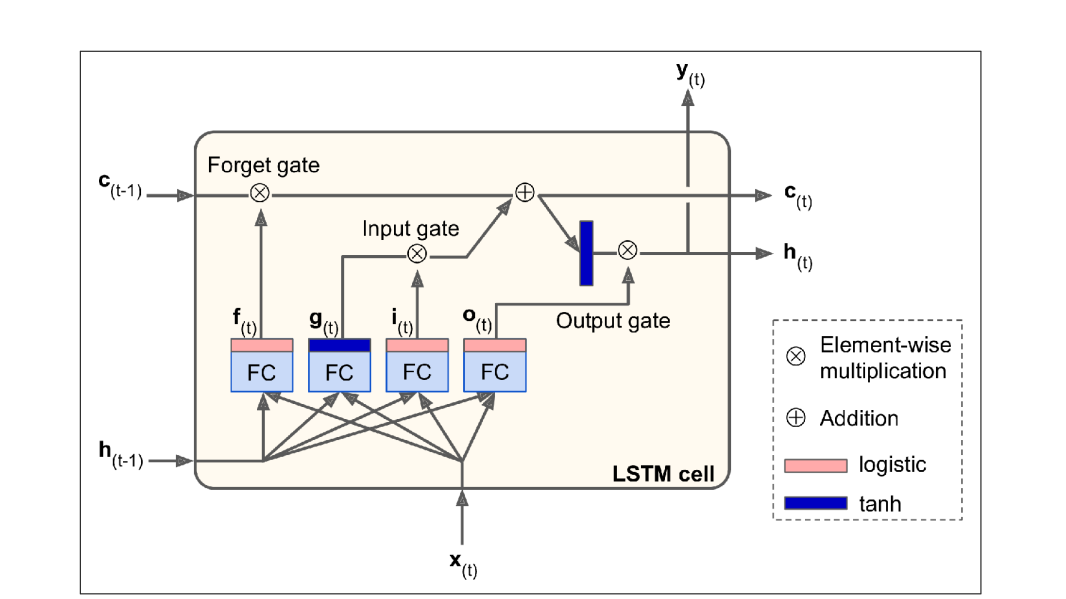

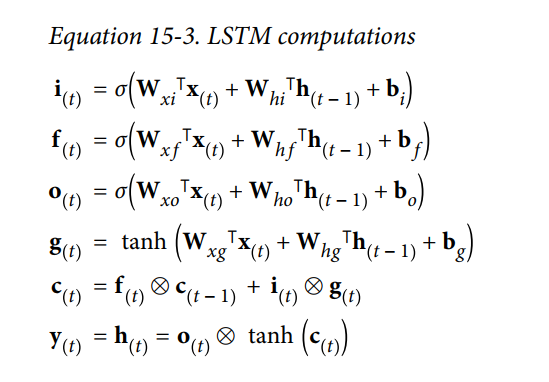

Now let’s open the box! The key idea is that the network can learn what to store in the
long-term state, what to throw away, and what to read from it. As the long-term state
c(t–1) traverses the network from left to right, you can see that it first goes through a
forget gate, dropping some memories, and then it adds some new memories via the
addition operation (which adds the memories that were selected by an input gate).
The result c
(t) is sent straight out, without any further transformation. So, at each time
step, some memories are dropped and some memories are added. Moreover, after the
addition operation, the long-term state is copied and passed through the tanh func‐
tion, and then the result is filtered by the output gate. This produces the short-term
state h
(t) (which is equal to the cell’s output for this time step, y(t)). Now let’s look at
where new memories come from and how the g

First, the current input vector x(t) and the previous short-term state h(t–1) are fed to
four different fully connected layers. They all serve a different purpose:
• The main layer is the one that outputs g(t). It has the usual role of analyzing the
current inputs x(t) and the previous (short-term) state h(t–1). In a basic cell, there is
nothing other than this layer, and its output goes straight out to y(t) and h(t). In
contrast, in an LSTM cell this layer’s output does not go straight out, but instead
its most important parts are stored in the long-term state (and the rest is
dropped).
• The three other layers are gate controllers. Since they use the logistic activation
function, their outputs range from 0 to 1. As you can see, their outputs are fed to element-wise multiplication operations, so if they output 0s they close the gate,
and if they output 1s they open it. Specifically:
— The forget gate (controlled by f(t)) controls which parts of the long-term state
should be erased.
— The input gate (controlled by i(t)) controls which parts of g(t) should be added
to the long-term state.
— Finally, the output gate (controlled by o(t)) controls which parts of the longterm state should be read and output at this time step, both to h(t) and to y(t).
In short, an LSTM cell can learn to recognize an important input (that’s the role of the
input gate), store it in the long-term state, preserve it for as long as it is needed (that’s
the role of the forget gate), and extract it whenever it is needed. This explains why
these cells have been amazingly successful at capturing long-term patterns in time
series, long texts, audio recordings, and more.

### **BACKPRPOAGATE A LSTM**


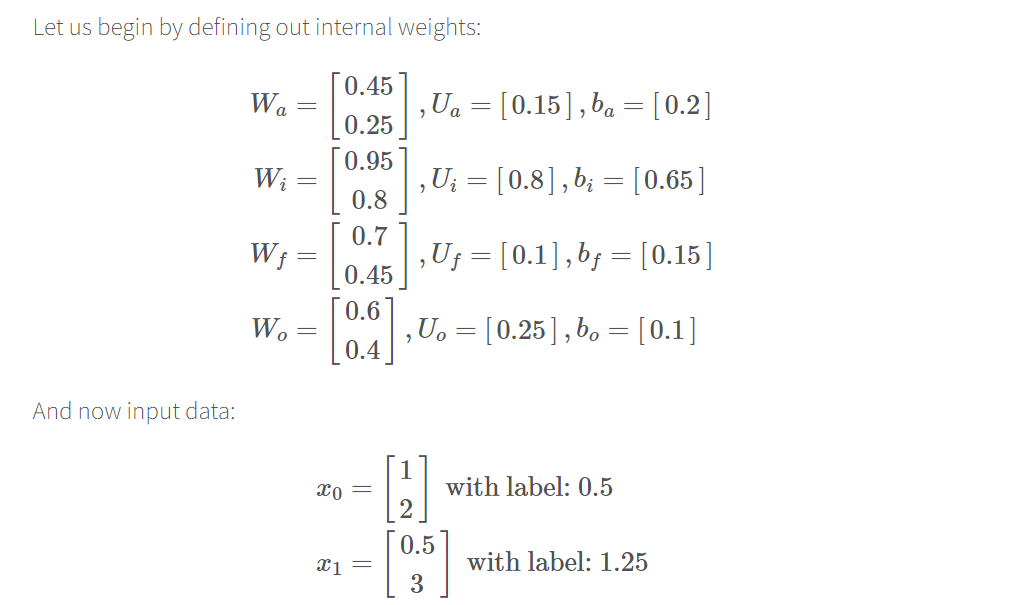

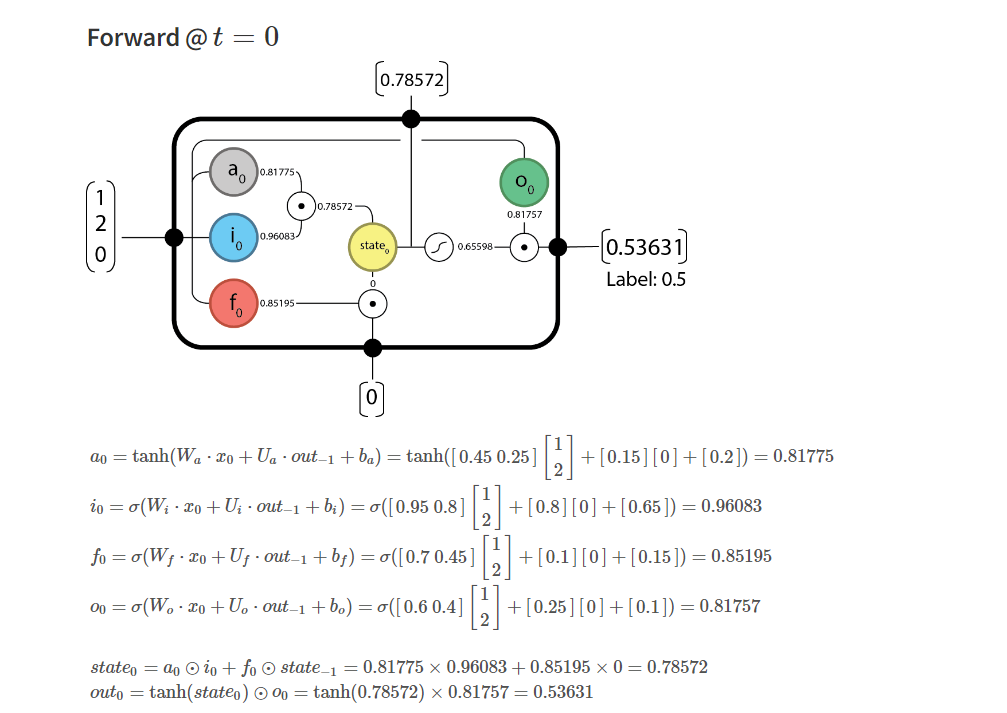

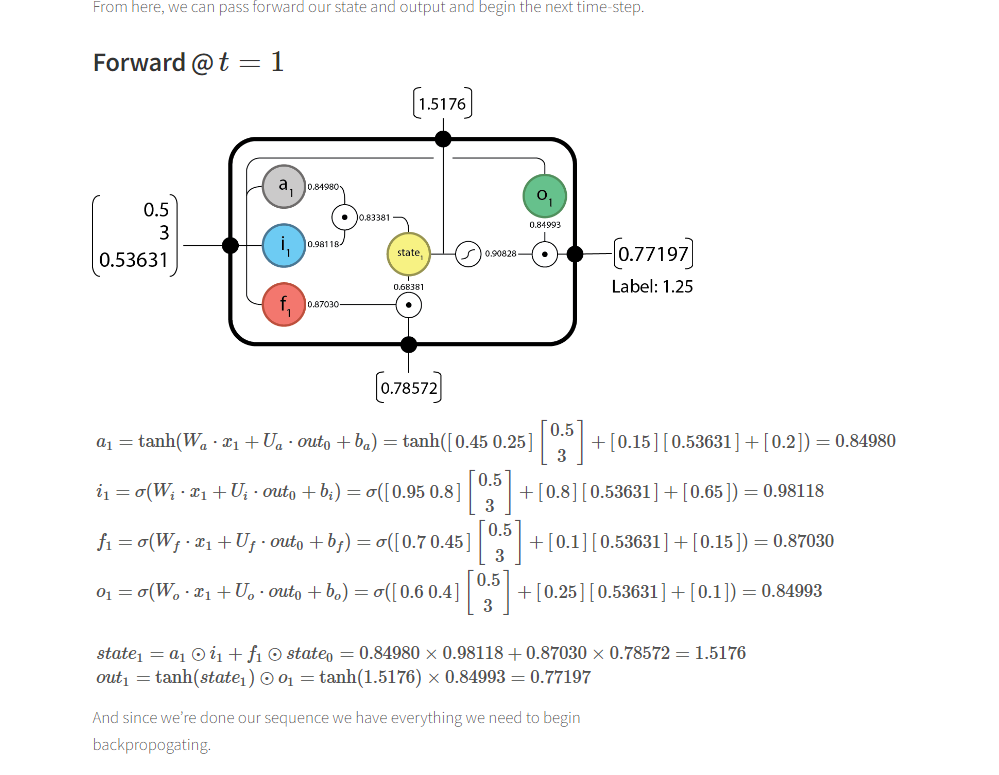

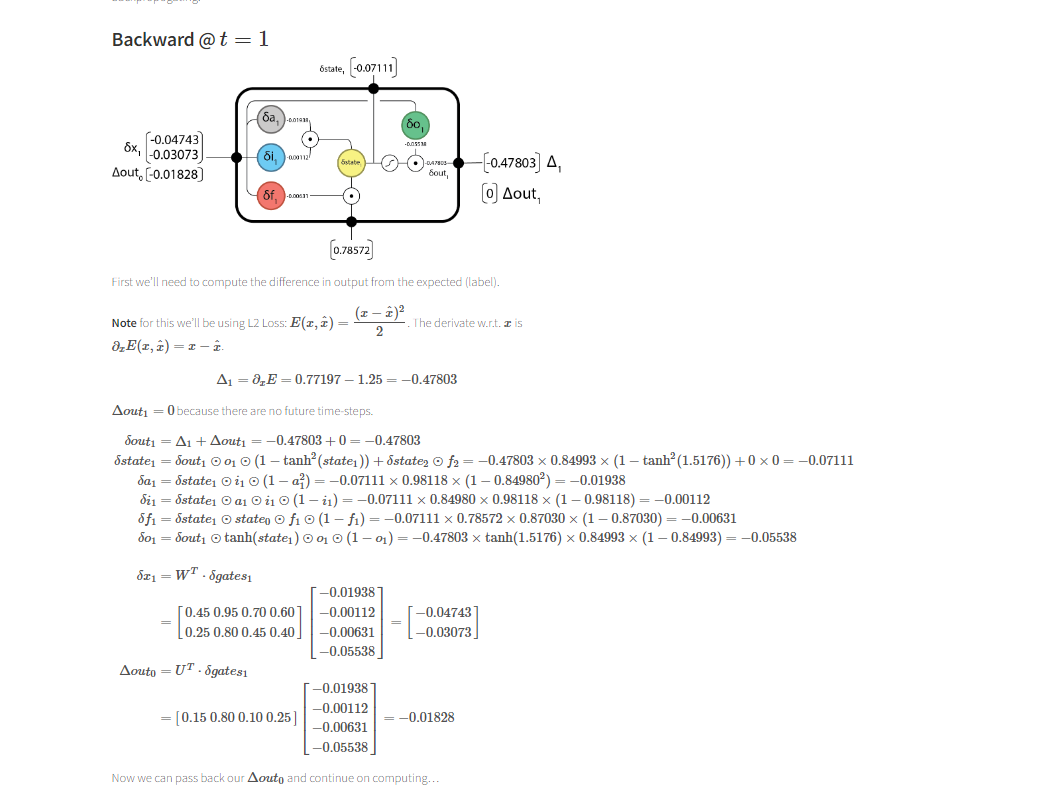

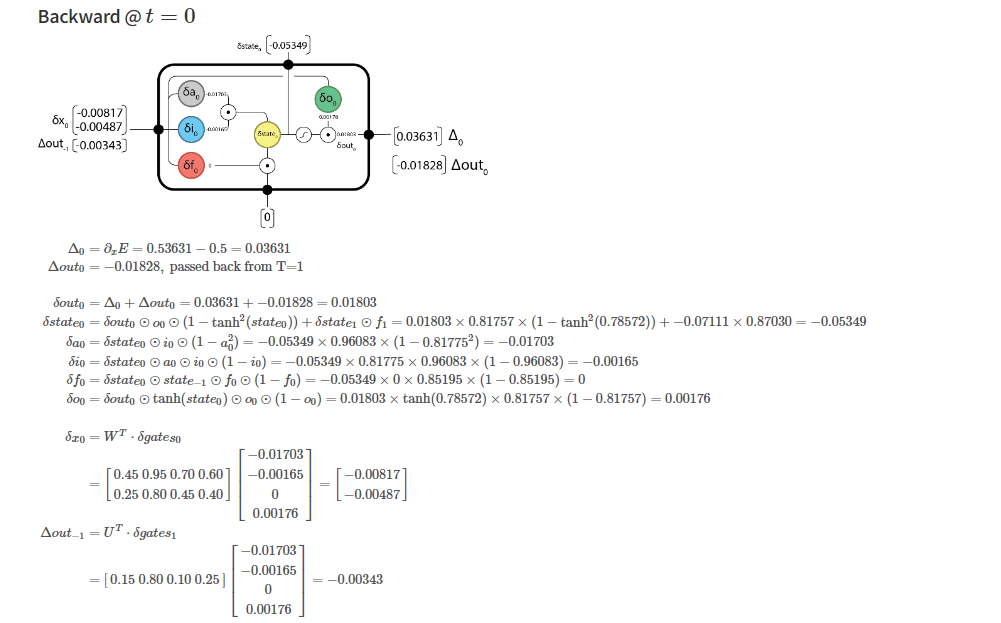

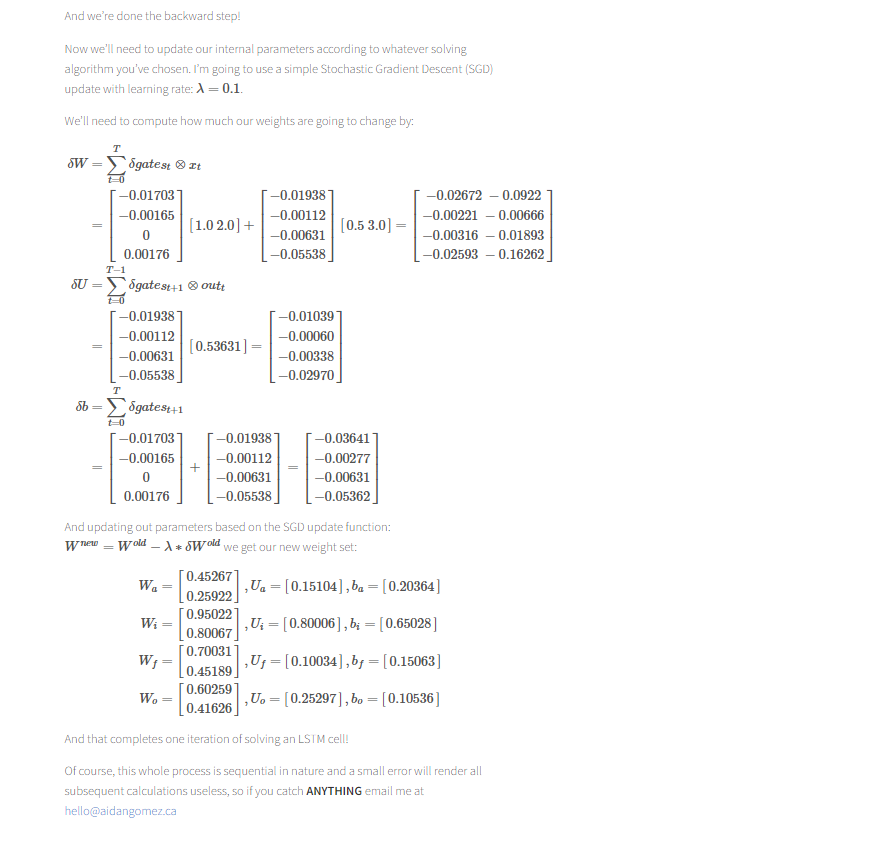

## **Codes**

## **RNN**

In [ ]:
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


from zipfile import ZipFile
import os

with ZipFile('/content/drive/MyDrive/AI-project3/jena_climate_2009_2016.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/AI-project3')


In [ ]:
csv_path = "/content/drive/MyDrive/AI-project3/jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

for simplifying the procedure here we only use one parameter to guess the other parameters

In [ ]:
df = df[['T (degC)']]

here we did min max scaling

In [ ]:

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])

In [ ]:
df.head()

T
0  0.248632
1  0.242163
2  0.240504
3  0.243822
4  0.244485

here we want to make a dataset.we want to use 3 last 72 hours to predict the nest 72 hour.

our x set have a starting index  and we put the starting index and next 72 hours in there.

for our y we only use the next 72 hours.


In [ ]:
ylist = list(df['T'])

n_future = 72
n_past = 3*72
total_period = 4*72

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1



X_new = np.array(X_new)
y_new = np.array(y_new)

we test train split the dataset

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.10, random_state=42)

In [ ]:
X_train.shape

(378236, 216)

for the sake of the input shape of RNN ,we re shaped the x_set.

In [ ]:
batch_size = 200

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )

X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

we build a model.we have 3 consecutive layers.for the first and second layer the return sequence is true so it will give the whole output to next layer to work with.

we use mean absolute error for this model.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 216, 8)            80        
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 216, 8)            136       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dense (Dense)               (None, 72)                648       
                                                                 
Total params: 1000 (3.91 KB)
Trainable params: 1000 (3.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1513/1513 [==============================] - 785s 516ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - val_loss: 0.0509 - val_mean_absolute_e

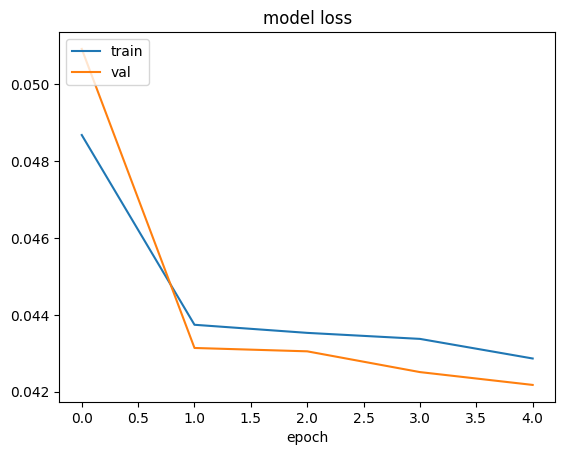

In [ ]:
random.seed(42)

simple_model = Sequential([
  SimpleRNN(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  SimpleRNN(8, activation='tanh', return_sequences = True),
  SimpleRNN(8, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Here i printed the r2 score to assess my model

In [ ]:
print(r2_score(preds, y_test))

0.7101001898516031


### **IMPROVED MODEL**

i added some layers and train the model for the second time.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 216, 5)            35        
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 216, 5)            55        
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 72)                432       
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
265/265 [==============================] - 52s 186ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - val_loss: 0.0463 - val_mean_absolute_err

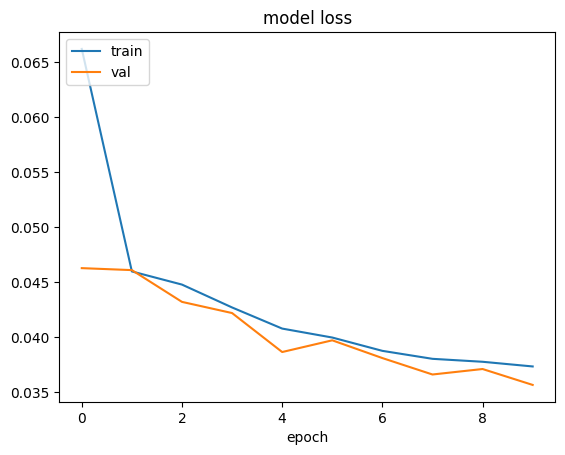

In [ ]:
random.seed(42)

simple_model = Sequential([
  SimpleRNN(5, activation='tanh',input_shape=((n_timesteps, n_features)), return_sequences=True),
  #SimpleRNN(5, activation='tanh', return_sequences = True),
  SimpleRNN(5, activation='tanh', return_sequences = True),
  SimpleRNN(5, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.3,
          epochs=10,
          batch_size=1000,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

this is the new r2 score

In [ ]:
print(r2_score(preds, y_test))

0.8292261852210377


In [ ]:
!pip install scikeras


### **GRU**

now let's use GRU and build a model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 72)                648       
                                                                 
Total params: 912 (3.56 KB)
Trainable params: 912 (3.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1513/1513 [==============================] - 131s 85ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - val_loss: 0.0307 - val_mean_absolute_error: 0.0307
Epoch 2/5
1513/1513 [==============================] - 127s 84ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - val_loss: 0.0430 - val_mean_absolute_error: 0.0430
Epoch 3/5
1513/1513 [==============================] - 127s 84ms/step - loss: 0.0393

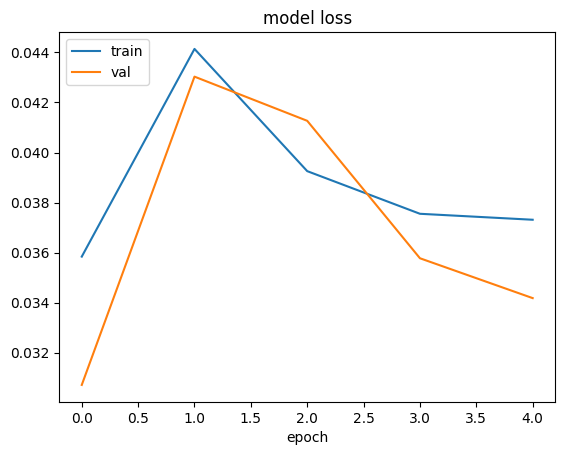

In [ ]:
random.seed(42)
from tensorflow.keras.layers import GRU

simple_model = Sequential([
   GRU(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

here we calculate R2 score to evaluate model

In [ ]:
print(r2_score(preds, y_test))

0.8518378670986364


### **IMPROVED MODEL**

again I added some layer and train the GRU

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_19 (GRU)                (None, 5)                 120       
                                                                 
 dense_12 (Dense)            (None, 72)                432       
                                                                 
Total params: 552 (2.16 KB)
Trainable params: 552 (2.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
530/530 [==============================] - 63s 114ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - val_loss: 0.0476 - val_mean_absolute_error: 0.0476
Epoch 2/25
530/530 [==============================] - 62s 116ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - val_loss: 0.0465 - val_mean_absolute_error: 0.0465
Epoch 3/25
530/530 [==============================] - 56s 107ms/step - loss: 0.0462 -

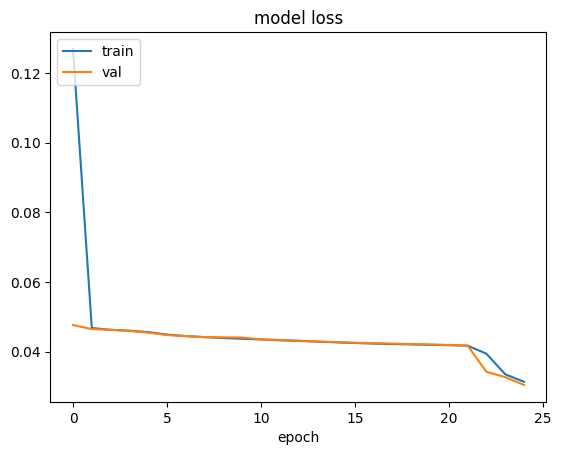

In [ ]:
random.seed(42)

simple_model = Sequential([
   GRU(5, activation='tanh',input_shape=(n_timesteps, n_features)),
  # GRU(5, activation='tanh', return_sequences=True),
   #GRU(5, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.3,
          epochs=25,
          batch_size=500,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.8950540830376466


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_20 (GRU)                (None, 5)                 120       
                                                                 
 dense_13 (Dense)            (None, 72)                432       
                                                                 
Total params: 552 (2.16 KB)
Trainable params: 552 (2.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
530/530 [==============================] - 64s 115ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - val_loss: 0.0477 - val_mean_absolute_error: 0.0477
Epoch 2/30
530/530 [==============================] - 60s 113ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - val_loss: 0.0465 - val_mean_absolute_error: 0.0465
Epoch 3/30
530/530 [==============================] - 58s 109ms/step - loss: 0.0463 -

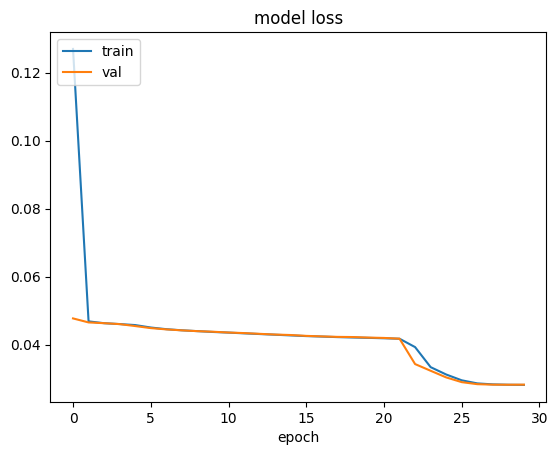

In [ ]:
random.seed(42)

simple_model = Sequential([
   GRU(5, activation='tanh',input_shape=(n_timesteps, n_features)),
  # GRU(5, activation='tanh', return_sequences=True),
   #GRU(5, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.3,
          epochs=30,
          batch_size=500,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.9238670105641599


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_22 (GRU)                (None, 5)                 120       
                                                                 
 dense_15 (Dense)            (None, 72)                432       
                                                                 
Total params: 552 (2.16 KB)
Trainable params: 552 (2.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40
530/530 [==============================] - 63s 114ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - val_loss: 0.0460 - val_mean_absolute_error: 0.0460
Epoch 2/40
530/530 [==============================] - 60s 114ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - val_loss: 0.0453 - val_mean_absolute_error: 0.0453
Epoch 3/40
530/530 [==============================] - 60s 114ms/step - loss: 0.0453 -

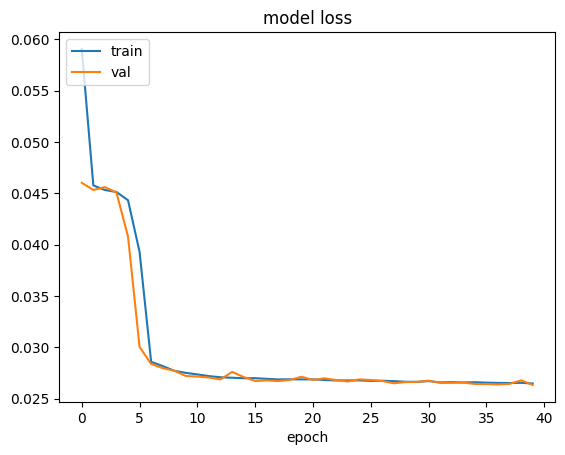

In [ ]:
random.seed(42)

simple_model = Sequential([
   GRU(5, activation='tanh',input_shape=(n_timesteps, n_features)),
  # GRU(5, activation='tanh', return_sequences=True),
   #GRU(5, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.3,
          epochs=40,
          batch_size=500,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.9238670105641599


### **LSTM**

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

we read a new dataset using pandas library

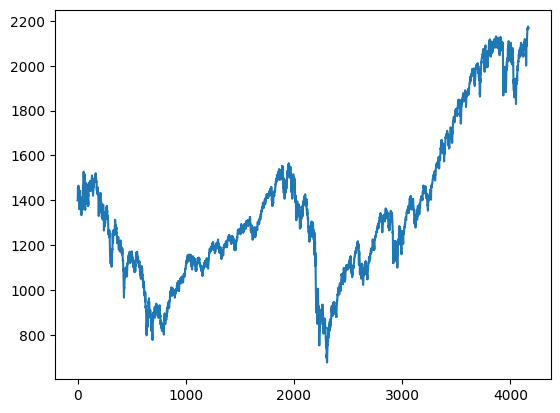

2791 1376


In [ ]:
dataset = pandas.read_csv('/content/drive/MyDrive/AI-project3/sp500.csv', usecols=[0], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

the dataset which we pass to our neural network is a little different from the other parts and we shoulf build it

here we have look back which is our window size which mean how many time frame should we look back in our x dataset.


as you can see we have a slice of our dataset which size is equal the look back.

this is a sample in our x_data

what about y data?

y data is the time frame immediately after this range

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

here we set look back which is our window size to 3.it means we look in three last time frames to decide our current time frame data

In [ ]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

(2787, 3)

to match the network we should reshape the train x

the shape should be like this:

(number of samples,number of feature,window size)

we have one feature. so the second argument is one in np.reshape

In [ ]:

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

now let's build the model

In [ ]:
model_before = Sequential()
model_before.add(LSTM(4, input_shape=(1, look_back)))
model_before.add(Dense(1))
model_before.compile(loss='mean_squared_error', optimizer='adam')
model_before.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
279/279 - 3s - loss: 0.0371 - 3s/epoch - 10ms/step
Epoch 2/100
279/279 - 1s - loss: 0.0045 - 647ms/epoch - 2ms/step
Epoch 3/100
279/279 - 1s - loss: 0.0019 - 766ms/epoch - 3ms/step
Epoch 4/100
279/279 - 1s - loss: 5.3867e-04 - 681ms/epoch - 2ms/step
Epoch 5/100
279/279 - 1s - loss: 2.0530e-04 - 670ms/epoch - 2ms/step
Epoch 6/100
279/279 - 1s - loss: 1.6546e-04 - 645ms/epoch - 2ms/step
Epoch 7/100
279/279 - 1s - loss: 1.6089e-04 - 629ms/epoch - 2ms/step
Epoch 8/100
279/279 - 1s - loss: 1.5896e-04 - 632ms/epoch - 2ms/step
Epoch 9/100
279/279 - 1s - loss: 1.5583e-04 - 641ms/epoch - 2ms/step
Epoch 10/100
279/279 - 1s - loss: 1.5234e-04 - 642ms/epoch - 2ms/step
Epoch 11/100
279/279 - 1s - loss: 1.4926e-04 - 700ms/epoch - 3ms/step
Epoch 12/100
279/279 - 1s - loss: 1.4603e-04 - 694ms/epoch - 2ms/step
Epoch 13/100
279/279 - 1s - loss: 1.4236e-04 - 994ms/epoch - 4ms/step
Epoch 14/100
279/279 - 1s - loss: 1.3968e-04 - 986ms/epoch - 4ms/step
Epoch 15/100
279/279 - 1s - loss: 1.3755e-0

In [ ]:
trainX.shape

(2787, 1, 3)

for having a better view of loss, we should scale back our number

as you can see i used inverse transform to do this

In [ ]:
trainPredict_before = model_before.predict(trainX)
testPredict_before = model_before.predict(testX)

trainPredict_before = scaler.inverse_transform(trainPredict_before)
trainY3_before = scaler.inverse_transform([trainY])
testPredict_before = scaler.inverse_transform(testPredict_before)
testY3_before = scaler.inverse_transform([testY])


43/43 [==============================] - 0s 2ms/step


In [ ]:
trainPredict_before.shape

(2787, 1)

this is the train and test score

In [ ]:

trainScore = math.sqrt(mean_squared_error(trainY3_before[0], trainPredict_before[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY3_before[0], testPredict_before[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14.93 RMSE
Test Score: 45.39 RMSE


## **IMPPROVED MODEL**

now i want to improve the model.


i increased the size of window by one

In [ ]:
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

(2786, 4)

In [ ]:

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
trainX.shape

(2786, 1, 4)

here i added a layer and i added some neurons

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back),return_sequences = True))
#model.add(LSTM(100,return_sequences = True))
#model.add(LSTM(100,return_sequences = True))
model.add(LSTM(100,return_sequences = True))
model.add(LSTM(100))
model.add(Dense(1))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 1, 100)            42000     
                                                                 
 lstm_8 (LSTM)               (None, 1, 100)            80400     
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 202901 (792.58 KB)
Trainable params: 202901 (792.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
history_improved=model.fit(trainX, trainY, epochs=50, batch_size=100, verbose=1)

Epoch 1/50
28/28 [==============================] - 8s 24ms/step - loss: 0.0649
Epoch 2/50
28/28 [==============================] - 1s 25ms/step - loss: 0.0077
Epoch 3/50
28/28 [==============================] - 1s 25ms/step - loss: 0.0038
Epoch 4/50
28/28 [==============================] - 1s 24ms/step - loss: 0.0016
Epoch 5/50
28/28 [==============================] - 1s 24ms/step - loss: 4.6782e-04
Epoch 6/50
28/28 [==============================] - 1s 21ms/step - loss: 2.6152e-04
Epoch 7/50
28/28 [==============================] - 0s 13ms/step - loss: 2.5141e-04
Epoch 8/50
28/28 [==============================] - 0s 15ms/step - loss: 2.4110e-04
Epoch 9/50
28/28 [==============================] - 0s 13ms/step - loss: 2.3073e-04
Epoch 10/50
28/28 [==============================] - 0s 13ms/step - loss: 2.2263e-04
Epoch 11/50
28/28 [==============================] - 0s 16ms/step - loss: 2.1416e-04
Epoch 12/50
28/28 [==============================] - 0s 13ms/step - loss: 2.0441e-04
Epoch

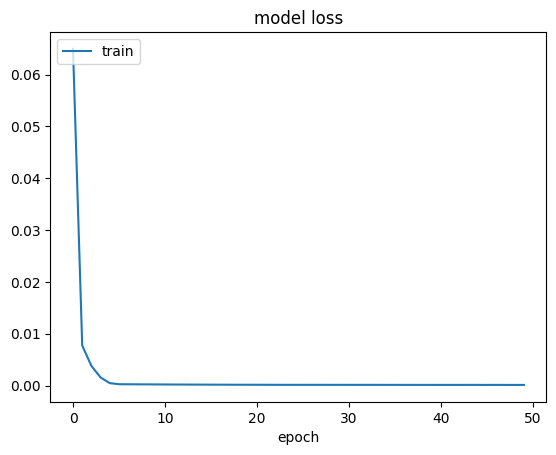

In [ ]:
plt.plot(history_improved.history['loss'])
#plt.plot(history_improved.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY3 = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY3 = scaler.inverse_transform([testY])


43/43 [==============================] - 0s 4ms/step


as ypu can see the train score increased a little bit but the test score decrease a large amount

In [ ]:

trainScore = math.sqrt(mean_squared_error(trainY3[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY3[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16.51 RMSE
Test Score: 23.73 RMSE


### **Search algorithms**

### A* search:

In [ ]:
!pip install heuristicsearch

In [ ]:
from heuristicsearch.a_star_search import AStar



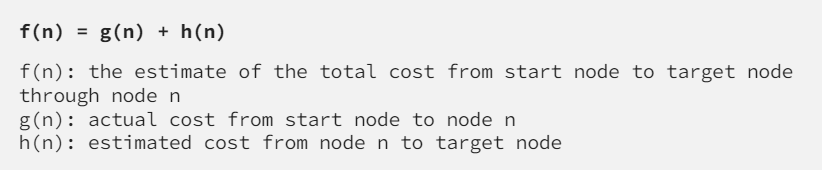

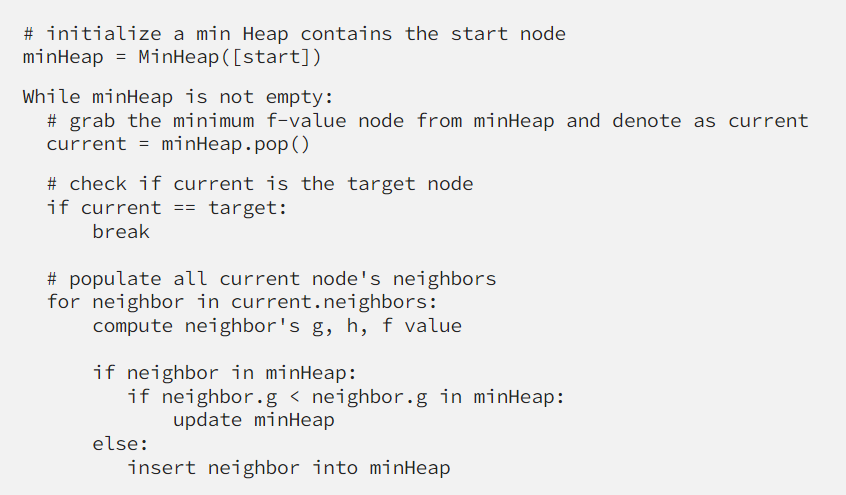

First example:

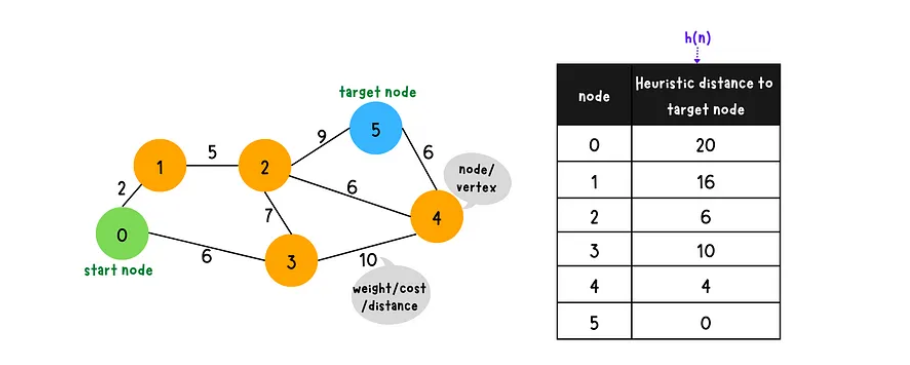

In [ ]:

adjacency_list = {
    '0': [('1', 2),('3', 10)],
    '1': [('2',5)],
    '2': [('5', 9),('4',6 ),('3',7)],
    '3': [('4', 10)],
    '4': [('5', 6)]



}
heuristics = {'0': 20, '1': 16, '2': 6, '3': 12, '4': 4,'5': 0}

graph1 = AStar(adjacency_list, heuristics)
path = graph1.apply_a_star(start='0', stop='5')
print("Shortest path:", path)

Path
0 -> 1 -> 2 -> 5
Cost
0 -> 2 -> 7 -> 16
Shortest path: None


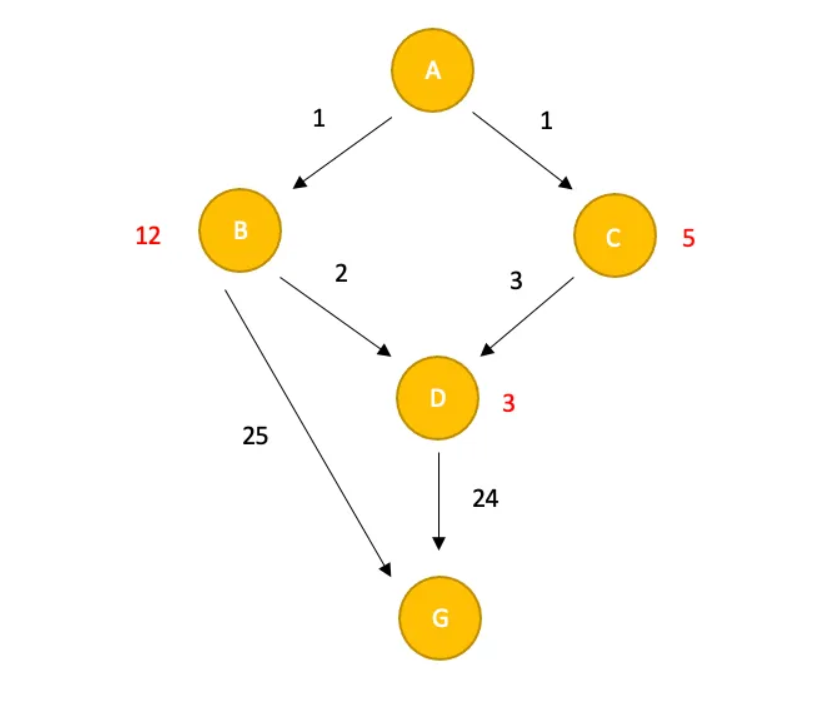

In [ ]:

adjacency_list = {
    'A': [('B', 1),('C', 1)],
    'B': [('D',2),('G',25)],
    'C': [('D', 3)],
    'D': [('G', 24)]




}
heuristics = {'A': 20, 'B': 12, 'C': 5, 'D': 3, 'G': 0}

graph1 = AStar(adjacency_list, heuristics)
path = graph1.apply_a_star(start='A', stop='G')
print("Shortest path:", path)

Path
A -> B -> G
Cost
0 -> 1 -> 26
Shortest path: None


Code from Scratch (example 1)

In [ ]:

adjacency_list = {
    '0': [('1', 2),('3', 10)],
    '1': [('2',5)],
    '2': [('5', 9),('4',6 ),('3',7)],
    '3': [('4', 10)],
    '4': [('5', 6)]



}
heuristics = {'0': 20, '1': 16, '2': 6, '3': 12, '4': 4,'5': 0}

graph1 = AStar(adjacency_list, heuristics)
path = graph1.apply_a_star(start='0', stop='5')
print("Shortest path:", path)

SyntaxError: invalid character '❤' (U+2764) (<ipython-input-36-fe7a79f8436d>, line 126)

In [ ]:
queue=[]

In [ ]:
import heapq


In [ ]:
class Node:
  def   __init__(self,neighbor,heuristic):
    self.neighbor=neighbor
    self.heuristic=heuristic

In [ ]:
Nodes=[]
heuristics = [20,  16,  6, 12,  4, 0]
for i in range(6):
  Nodes.append(Node(adjacency_list[str(i)],heuristics[i]))


### **Uniform cost search**

Uniform-Cost Search is a variant of Dijikstra’s algorithm. Here, instead of inserting all vertices into a priority queue, we insert only the source, then one by one insert when needed. In every step, we check if the item is already in the priority queue (using the visited array). If yes, we perform the decrease key, else we insert it.

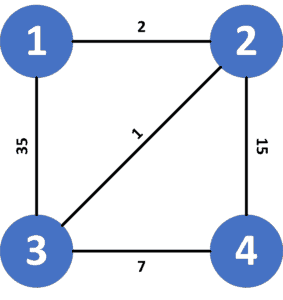

In [128]:
adjacency_list = {
    '1': [('2', 2),('3', 35)],
    '2': [('3',1),('4',15)],
    '3': [('2', 1),('4',7)],
    '4': [('3', 7)]




}
heuristics = {'1': 0, '2': 0, '3': 0, '4': 0}

graph1 = AStar(adjacency_list, heuristics)
path = graph1.apply_a_star(start='1', stop='4')


Path
1 -> 2 -> 3 -> 4
Cost
0 -> 2 -> 3 -> 10


## **DFS**

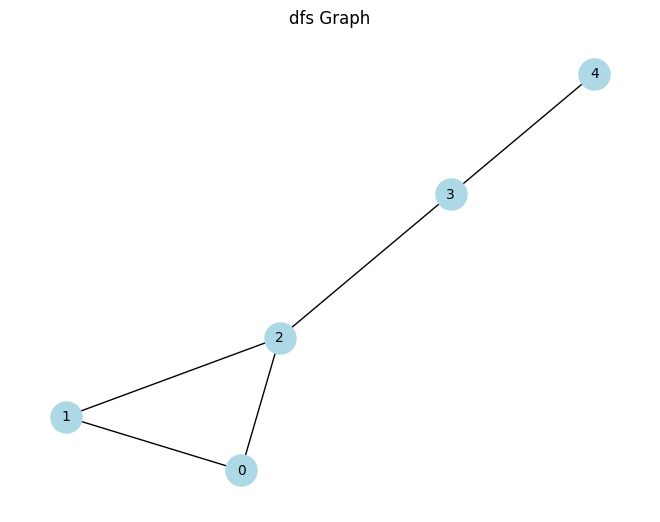

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the nodes (people)
nodes = ['0', '1', '2', '3', '4']

# Define the edges (constraints) based on your provided constraints
edges = [
    ('0', '1'),
    ('0', '2'),
    ('1', '2'),
    ('2', '0'),
    ('2', '3'),
    ('3', '4')

]

# Create the graph
graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

# Draw the graph
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black')
plt.title('dfs Graph')
plt.show()

In [ ]:
# Python3 program to print DFS traversal
# from a given  graph
from collections import defaultdict


# This class represents a directed graph using
# adjacency list representation
class Graph:

    # Constructor
    def __init__(self):

        # Default dictionary to store graph
        self.graph = defaultdict(list)


    # Function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)


    # A function used by DFS
    def DFSUtil(self, v, visited,node):

        # Mark the current node as visited
        # and print it
        visited.add(v)
        print(v, end=' ')
        if(v==node):
          print("we find it")
          return



        # Recur for all the vertices
        # adjacent to this vertex
        for neighbour in self.graph[v]:
            if neighbour not in visited:
                self.DFSUtil(neighbour, visited,node)


    # The function to do DFS traversal. It uses
    # recursive DFSUtil()
    def DFS(self, v,node):

        # Create a set to store visited vertices
        visited = set()

        # Call the recursive helper function
        # to print DFS traversal
        self.DFSUtil(v, visited,node)


# Driver's code
if __name__ == "__main__":
    g = Graph()
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 2)
    g.addEdge(2, 0)
    g.addEdge(2, 3)
    g.addEdge(3, 4)

    print("Following is Depth First Traversal (starting from vertex 2)")

    # Function call
    g.DFS(0,2)

Following is Depth First Traversal (starting from vertex 2)
0 1 2 we find it


### **BFS**

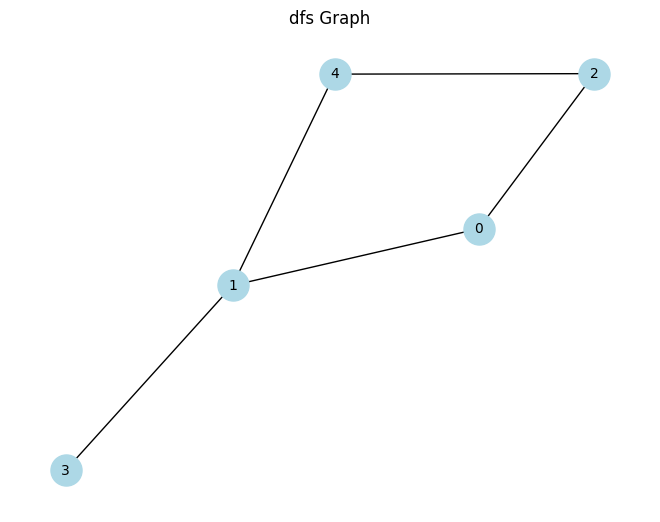

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the nodes (people)
nodes = ['0', '1', '2', '3', '4']

# Define the edges (constraints) based on your provided constraints
edges = [
    ('0', '1'),
    ('0', '2'),
    ('1', '3'),
    ('1', '4'),
    ('2', '4')


]

# Create the graph
graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

# Draw the graph
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black')
plt.title('dfs Graph')
plt.show()

In [ ]:
from collections import deque

# Function to perform Breadth First Search on a graph
# represented using adjacency list
def bfs(adjList, startNode, visited,node):
    # Create a queue for BFS
    q = deque()

    # Mark the current node as visited and enqueue it
    visited[startNode] = True
    q.append(startNode)
    find=0
    # Iterate over the queue
    while q:
        # Dequeue a vertex from queue and print it
        currentNode = q.popleft()

        print(currentNode, end=" ")
        if(currentNode==node):
          find=1
          print('')
          print("we reached it!")
          break
        # Get all adjacent vertices of the dequeued vertex
        # If an adjacent has not been visited, then mark it visited and enqueue it
        for neighbor in adjList[currentNode]:
            if not visited[neighbor]:
                visited[neighbor] = True
                q.append(neighbor)
    print('')
    if(not find):
      #print(find)
      print("\n it is not in the graph!")

# Function to add an edge to the graph
def addEdge(adjList, u, v):
    adjList[u].append(v)

def main():
    # Number of vertices in the graph
    vertices = 5

    # Adjacency list representation of the graph
    adjList = [[] for _ in range(vertices)]

    # Add edges to the graph
    addEdge(adjList, 0, 1)
    addEdge(adjList, 0, 2)
    addEdge(adjList, 1, 3)
    addEdge(adjList, 1, 4)
    addEdge(adjList, 2, 4)

    # Mark all the vertices as not visited
    visited = [False] * vertices

    # Perform BFS traversal starting from vertex 0
    print("Breadth First Traversal starting from vertex 0:", end=" ")
    bfs(adjList, 0, visited,2)

if __name__ == "__main__":
    main()

Breadth First Traversal starting from vertex 0: 0 1 2 
we reached it!



### **Min max search**

MINIMAX algorithm is a backtracking algorithm where it backtracks to pick the best move out of several choices. MINIMAX strategy follows the DFS (Depth-first search) concept. Here, we have two players MIN and MAX, and the game is played alternatively between them, i.e., when MAX makes a move, then the next turn is of MIN. It means the move made by MAX is fixed and, he cannot change it. The same concept is followed in the DFS strategy, i.e., we follow the same path and cannot change in the middle. That’s why in the MINIMAX algorithm, instead of BFS, we follow DFS.

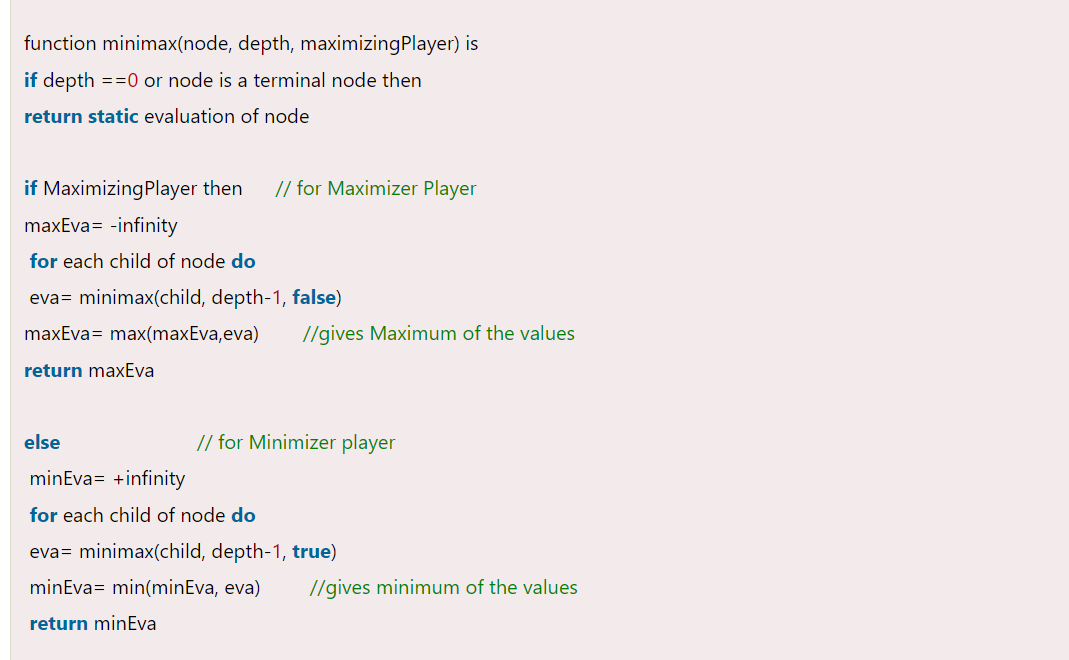

The algorithm evaluates each leaf node using a heuristic evaluation function, obtaining the values shown. The moves where the maximizing player wins are assigned with positive infinity, while the moves that lead to a win of the minimizing player are assigned with negative infinity. At level 3, the algorithm will choose, for each node, the smallest of the child node values, and assign it to that same node (e.g. the node on the left will choose the minimum between "10" and "+∞", therefore assigning the value "10" to itself). The next step, in level 2, consists of choosing for each node the largest of the child node values. Once again, the values are assigned to each parent node. The algorithm continues evaluating the maximum and minimum values of the child nodes alternately until it reaches the root node, where it chooses the move with the largest value (represented in the figure with a blue arrow). This is the move that the player should make in order to minimize the maximum possible loss.

### **NUMERICAL EXAMPLE**

### **Example 1**

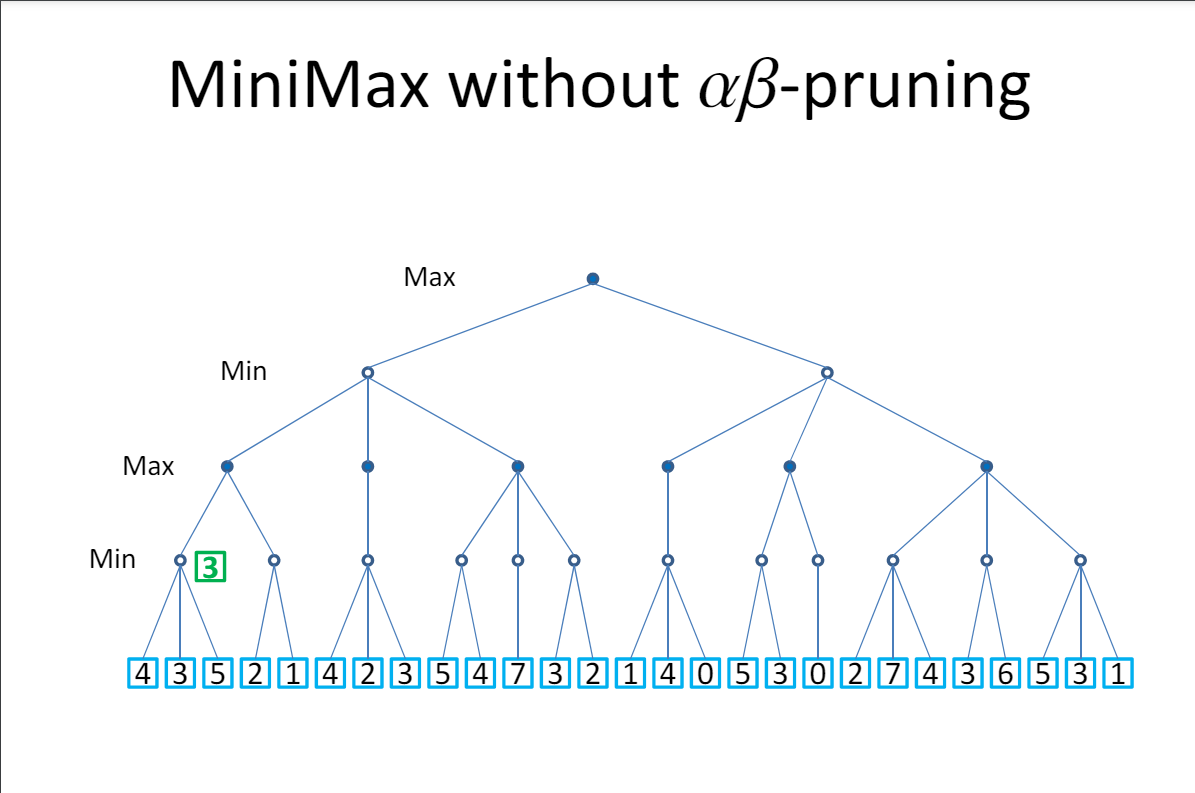

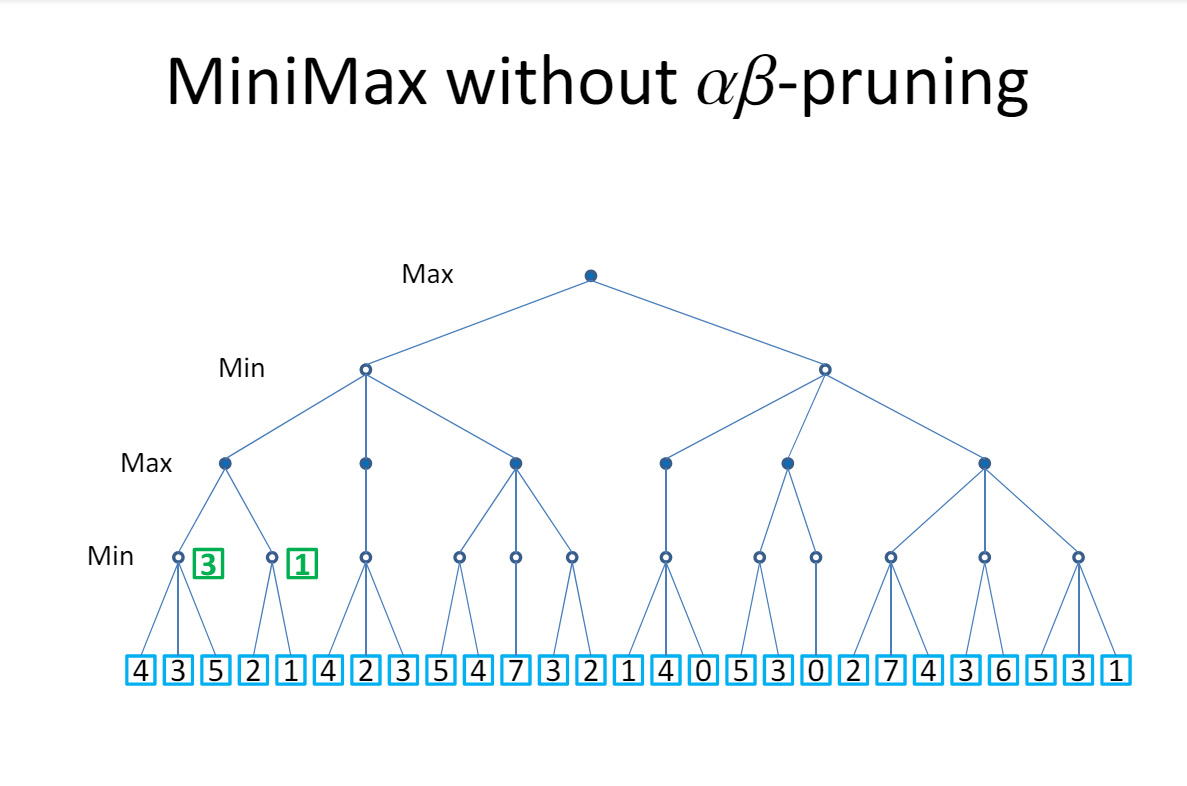

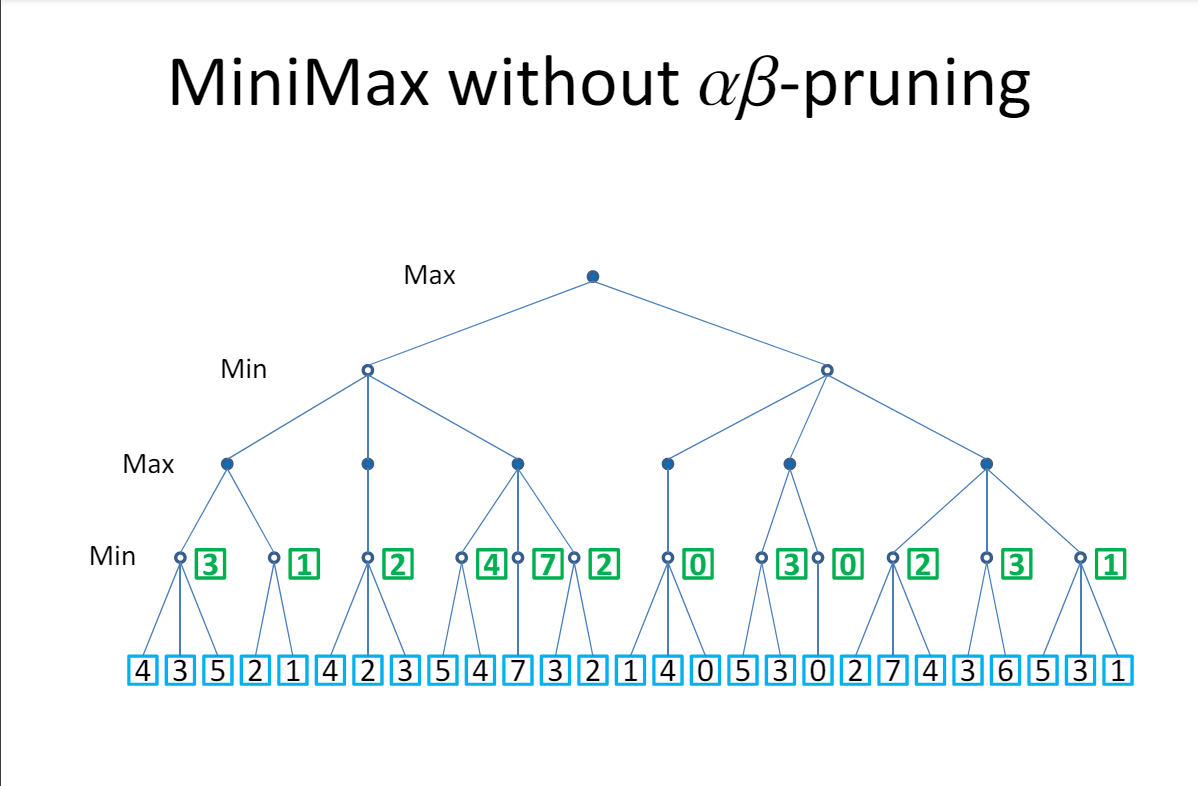

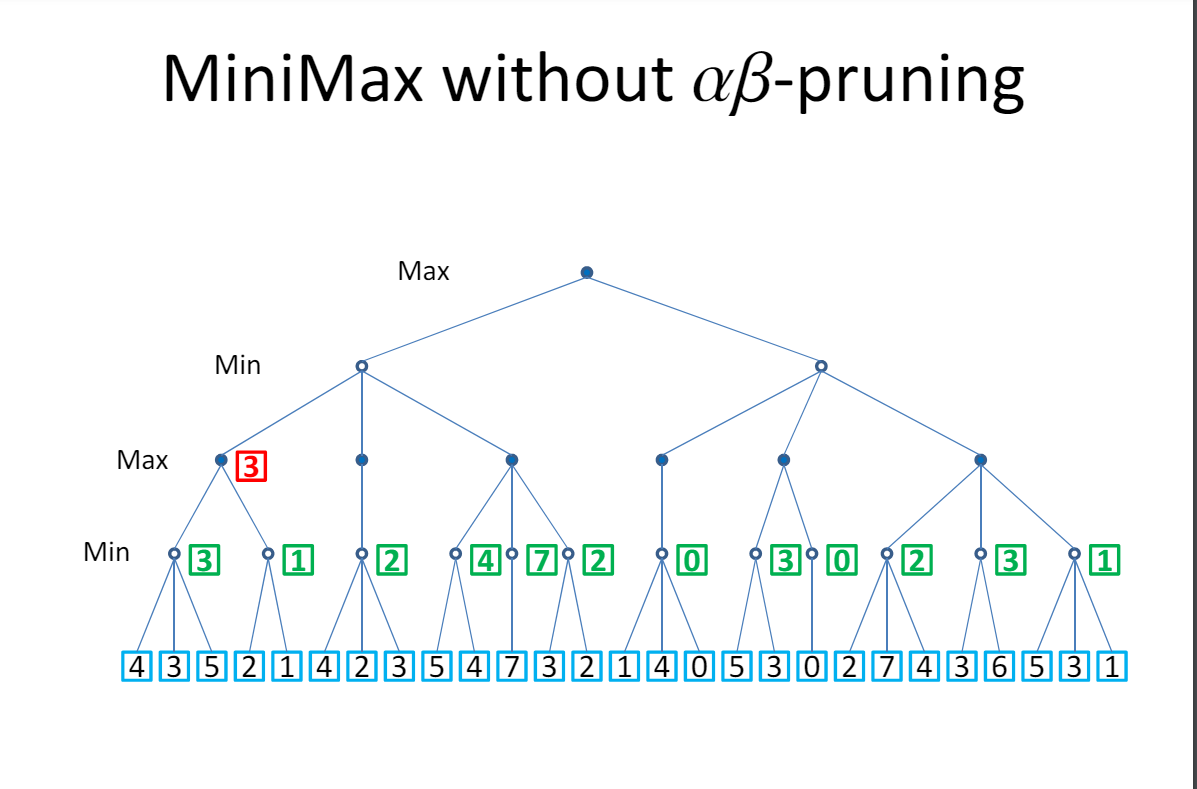

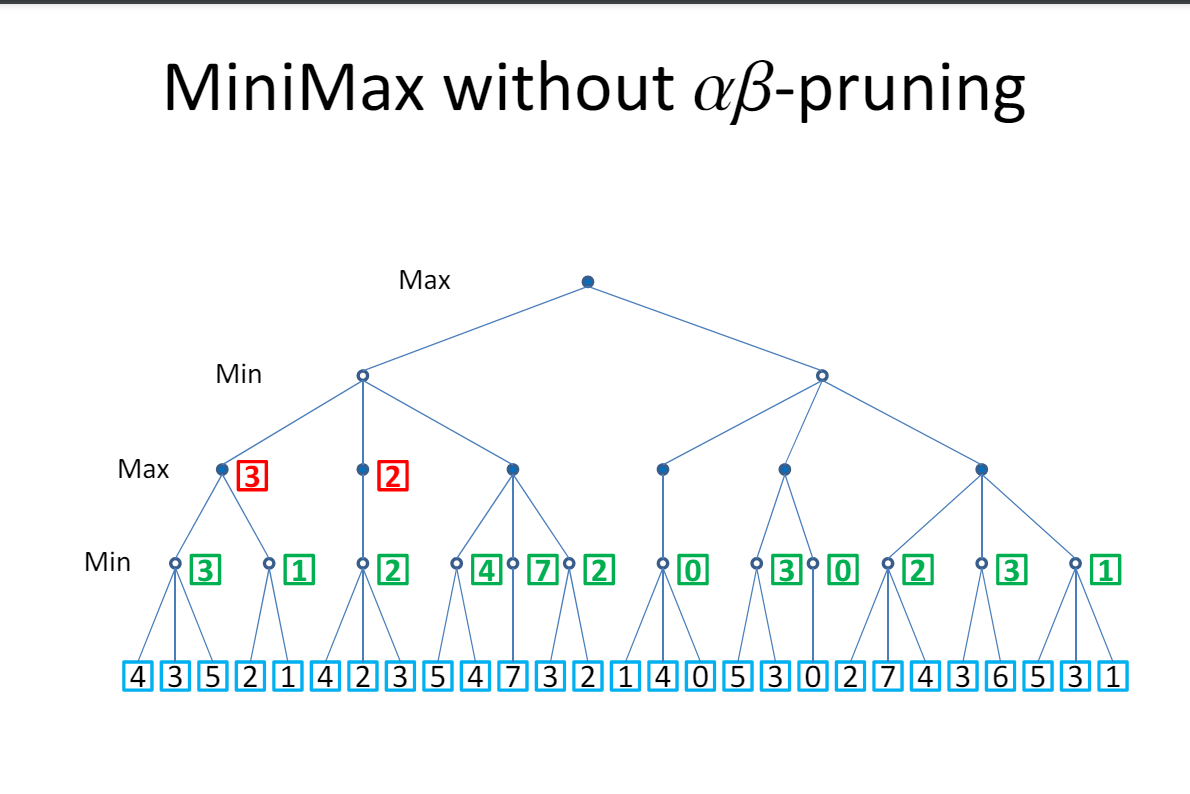

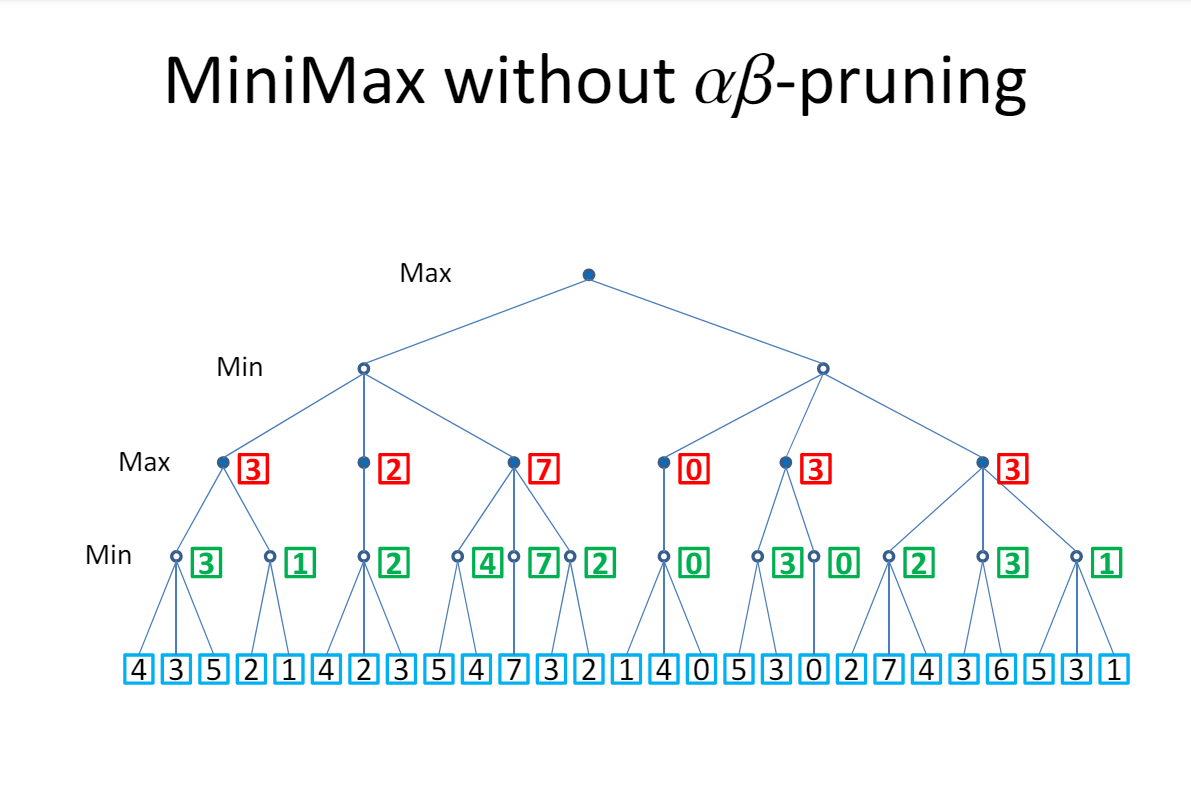

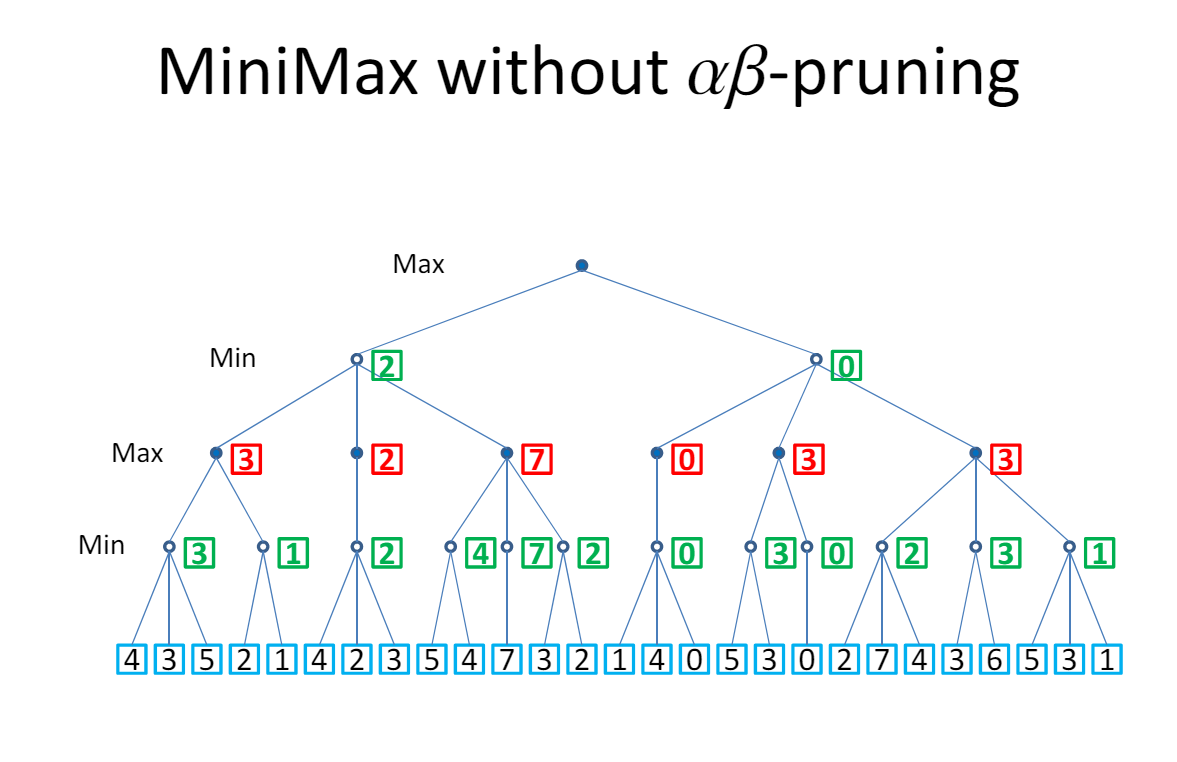

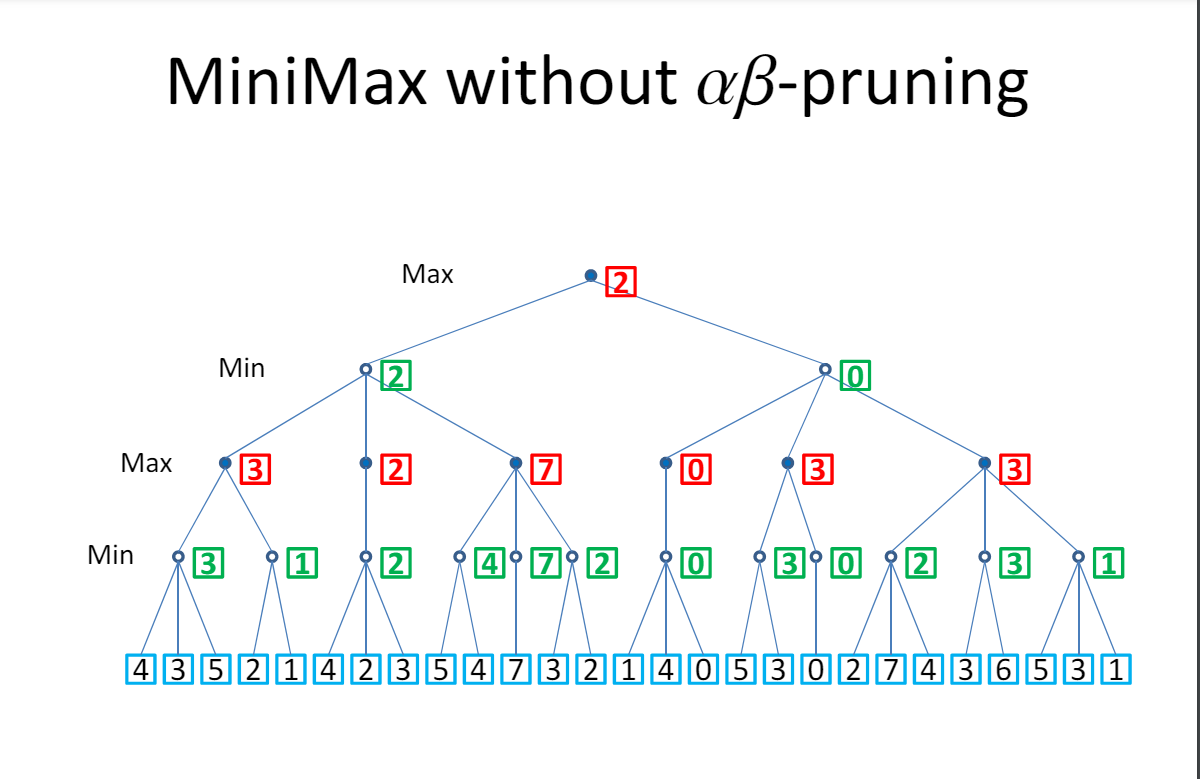

In [11]:
leaves=[[4,3,5],[2,1],[4,2,3],[5,4],[7],[3,2],[1,4,0],[5,3],[0],[2,7,4],[3,6],[5,3,1]]

In [30]:
def find_new_level(level,min_flag):

  second_level=[]
  for i in range(len(level)):

    if min_flag:
      second_level.append(min(level[i]))
    else:
      second_level.append(max(level[i]))
  return second_level



In [31]:
second_level=find_new_level(leaves,1)

In [32]:
second_level

[3, 1, 2, 4, 7, 2, 0, 3, 0, 2, 3, 1]

In [52]:
second_level_new=[second_level[0:2],[second_level[2]],second_level[3:6],[second_level[6]],second_level[7:9],second_level[9:]]

In [53]:
second_level_new

[[3, 1], [2], [4, 7, 2], [0], [3, 0], [2, 3, 1]]

In [54]:
third_level=find_new_level(second_level_new,0)

In [56]:
third_level_new=[third_level[:3],third_level[3:]]



In [59]:
fourth_level=find_new_level(third_level_new,1)

In [60]:
fourth_level

[2, 0]

In [61]:
max(fourth_level)

2

### **Example 2**

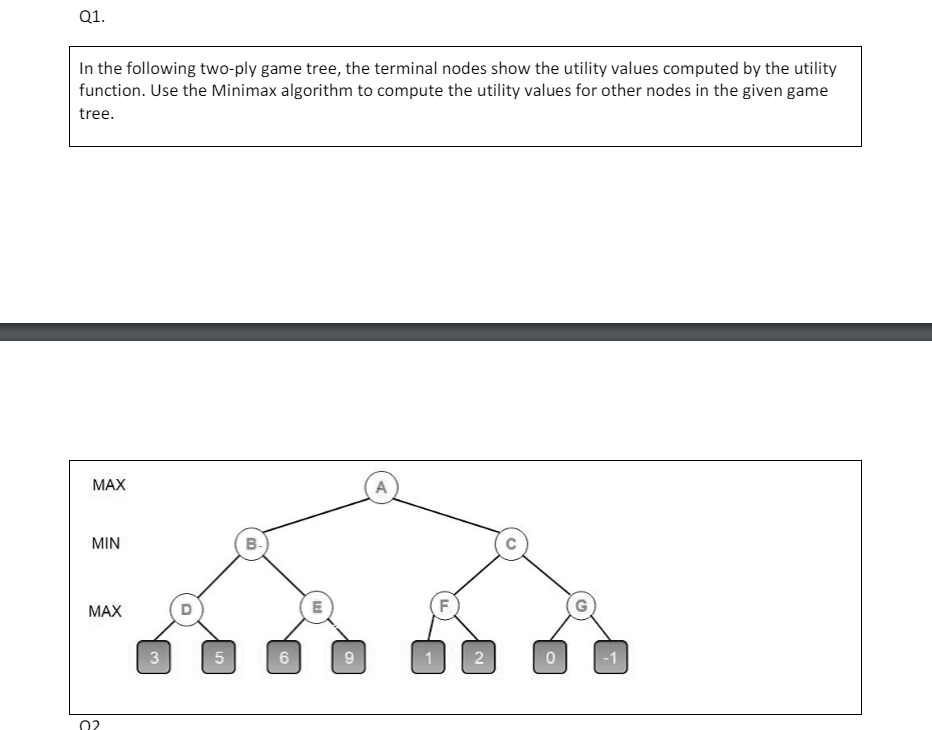

In [111]:
import numpy as np

In [113]:
def find_new_level(level,min_flag):

  second_level=[]
  for i in range(len(level)):

    if min_flag:
      second_level.append(min(level[i]))
    else:
      second_level.append(np.max(level[i]))
  return second_level

In [105]:
leaves=[[3,5],[6,9],[1,2],[0,-1]]

In [115]:
level_2=find_new_level(leaves,0)








In [117]:
new_level_2=[level_2[:2],level_2[2:]]

In [118]:
level_3=find_new_level(new_level_2,1)

In [120]:
np.max(level_3)

5

### A* search algorithm numerical examples

### **Example 1**

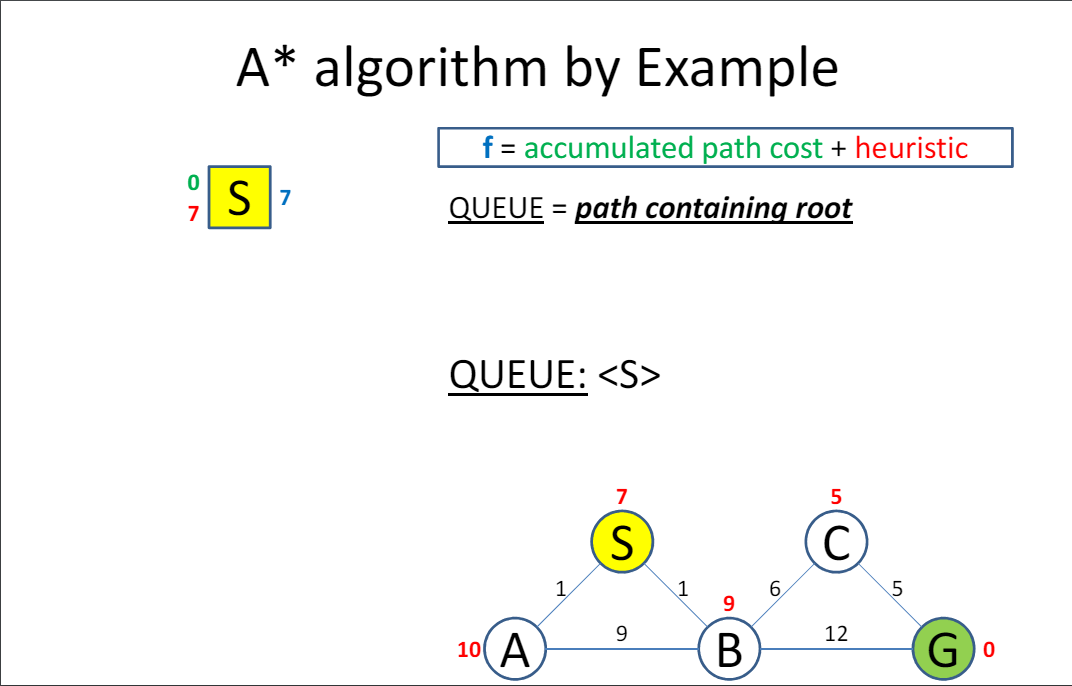

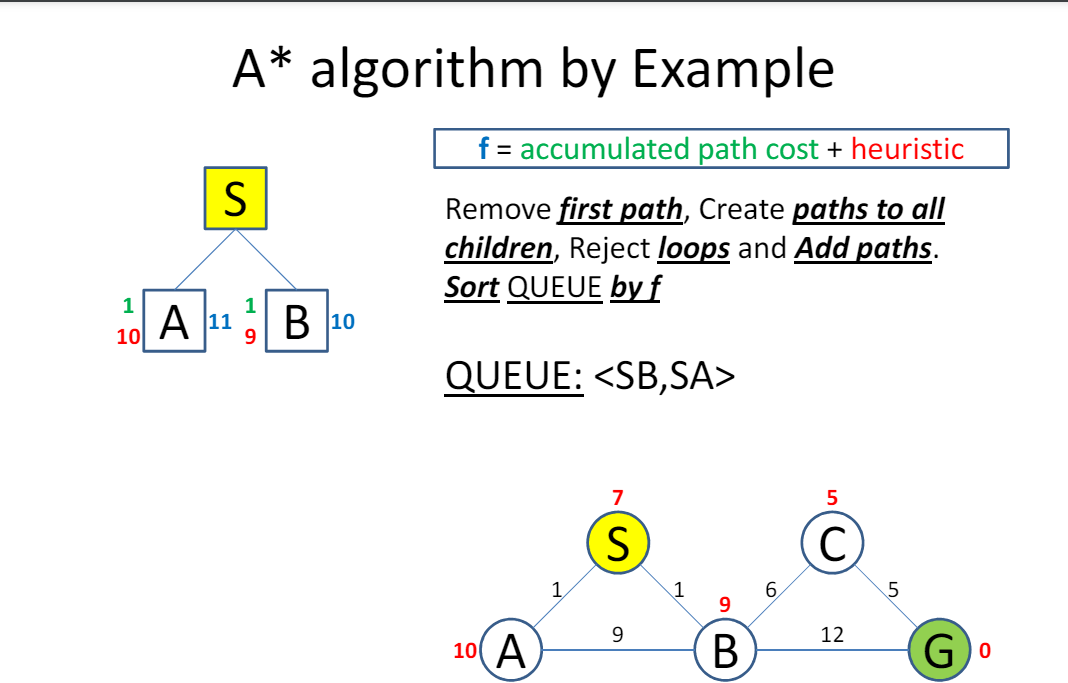

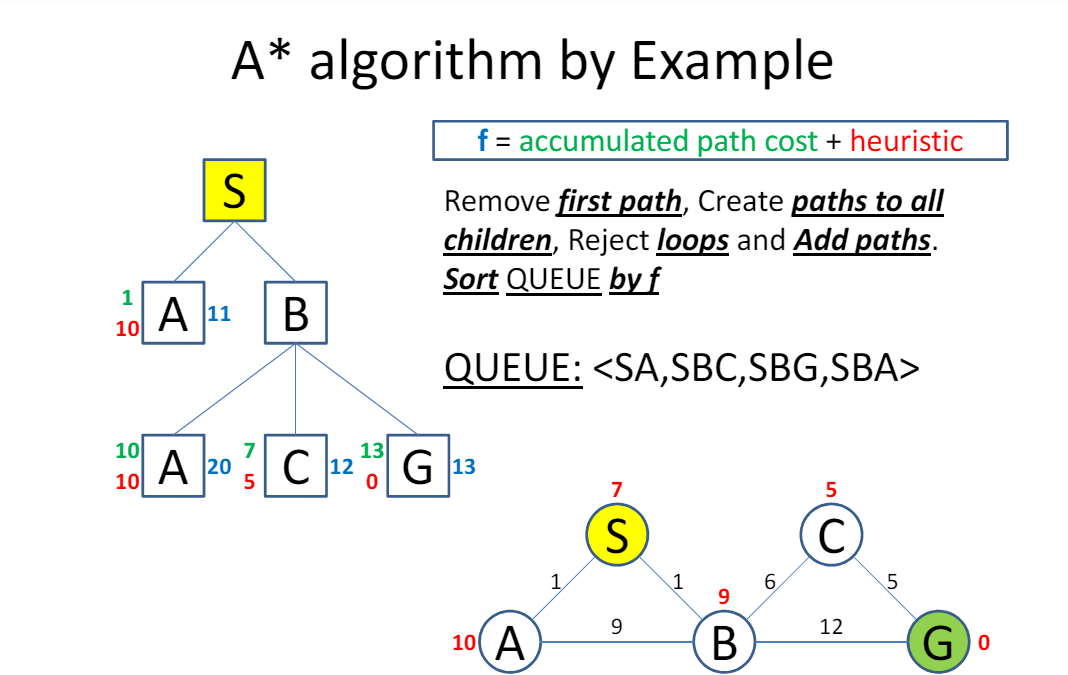

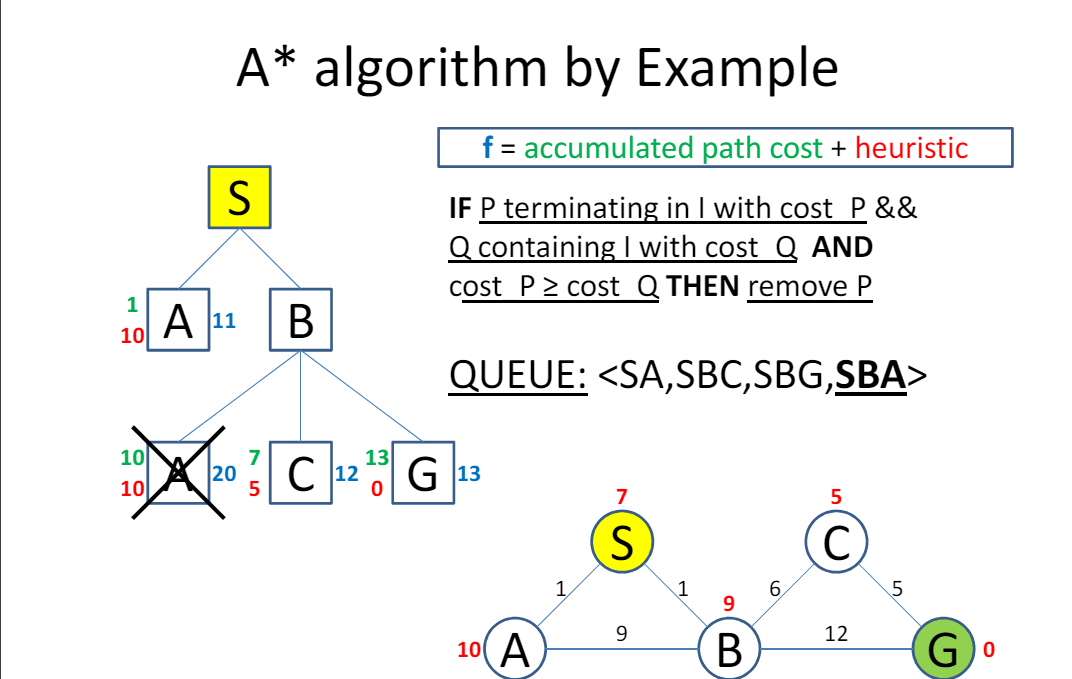

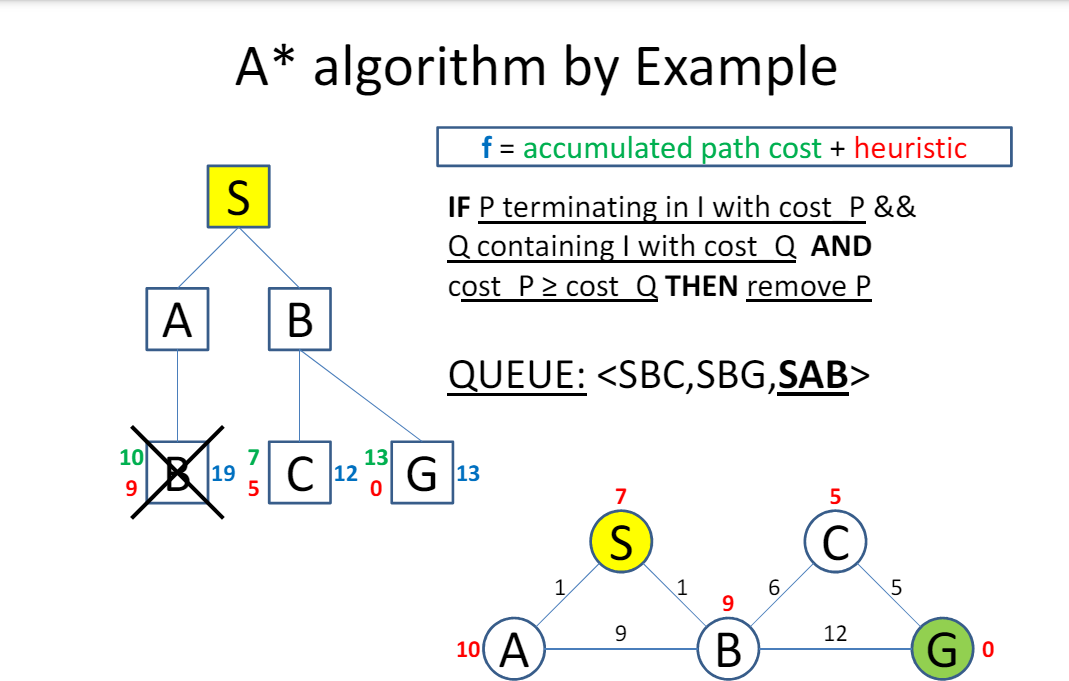

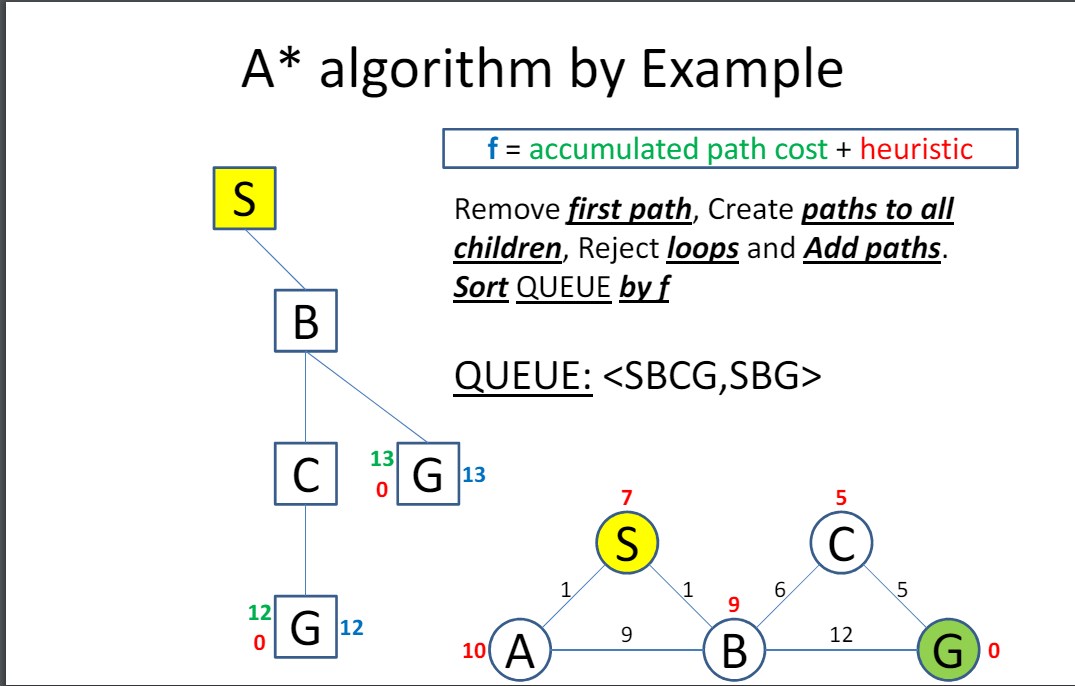

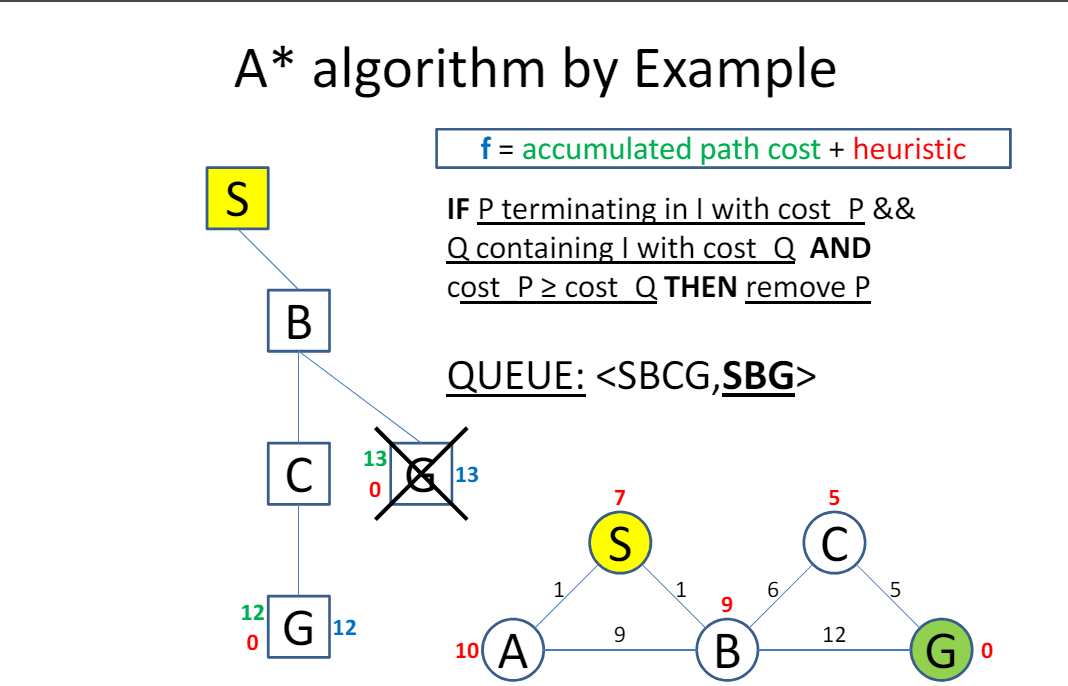

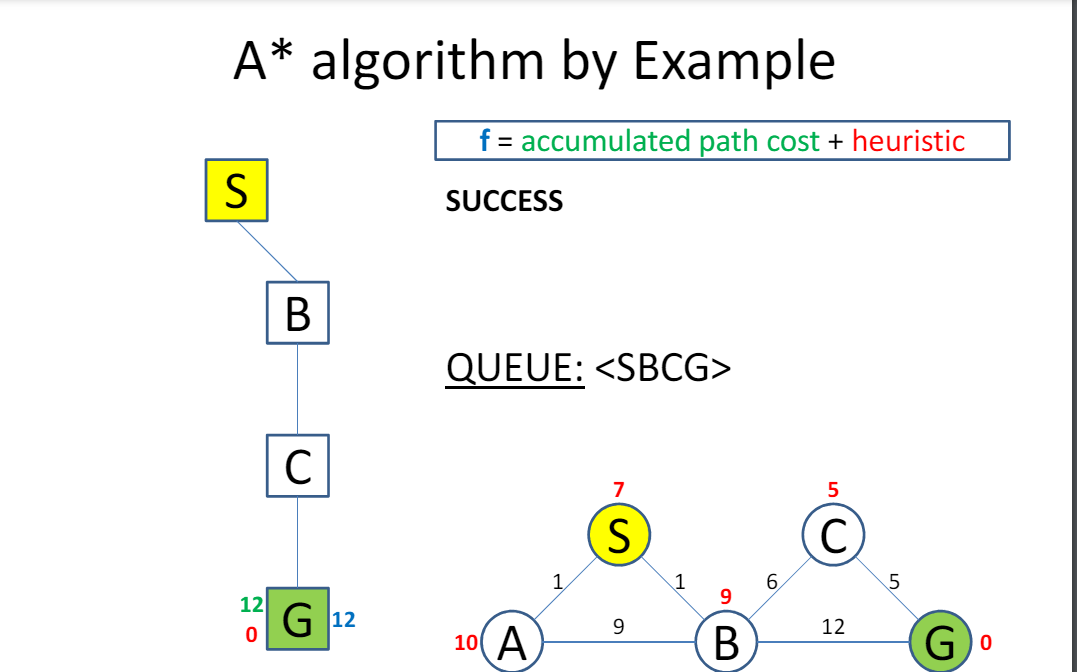

In [121]:
!pip install heuristicsearch

In [122]:
from heuristicsearch.a_star_search import AStar

In [124]:

adjacency_list = {
    'A': [('S', 1),('B', 9)],
    'B': [('C',6),('G',12)],
    'S': [('A', 1),('B',1 )],
    'C': [('G', 5)],
    'G': [('C', 5),('B',12)]



}
heuristics = {'S': 7, 'A': 10, 'B': 9, 'C': 5, 'G': 0}

graph1 = AStar(adjacency_list, heuristics)
path = graph1.apply_a_star(start='S', stop='G')
#print("Shortest path:", path)

Path
S -> B -> C -> G
Cost
0 -> 1 -> 7 -> 12


### **Example 2**

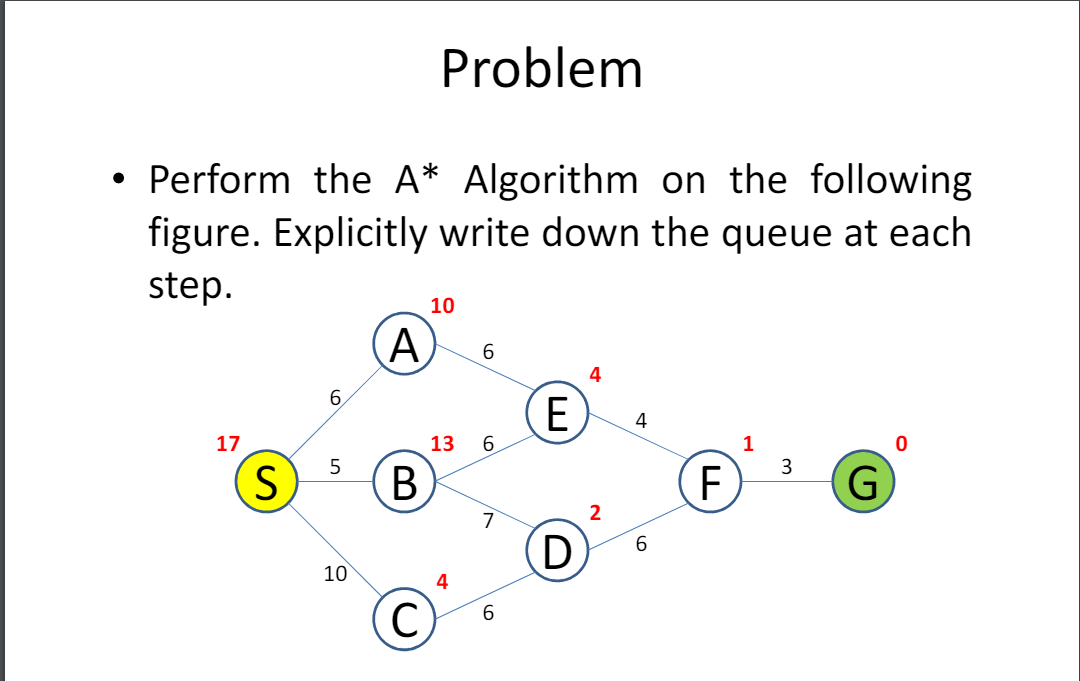

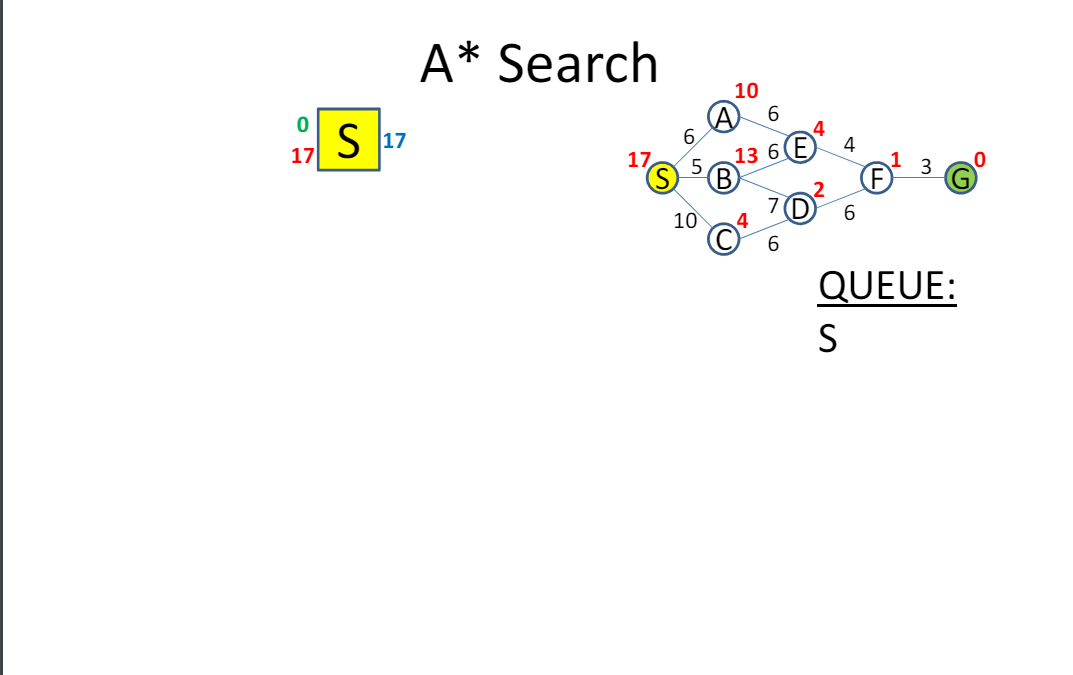

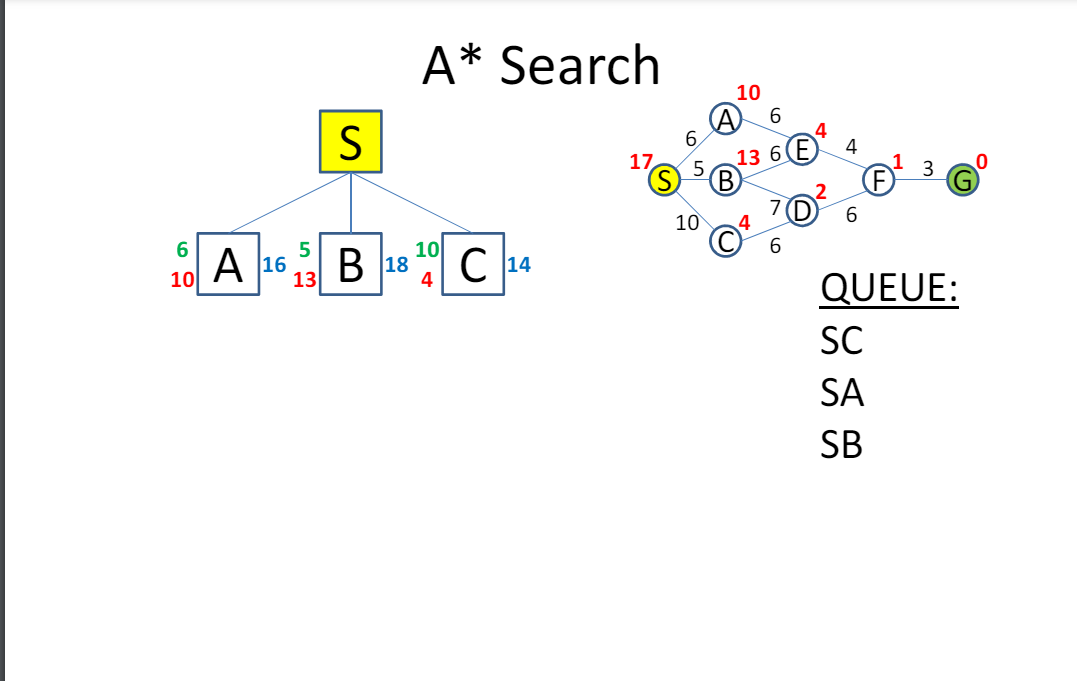

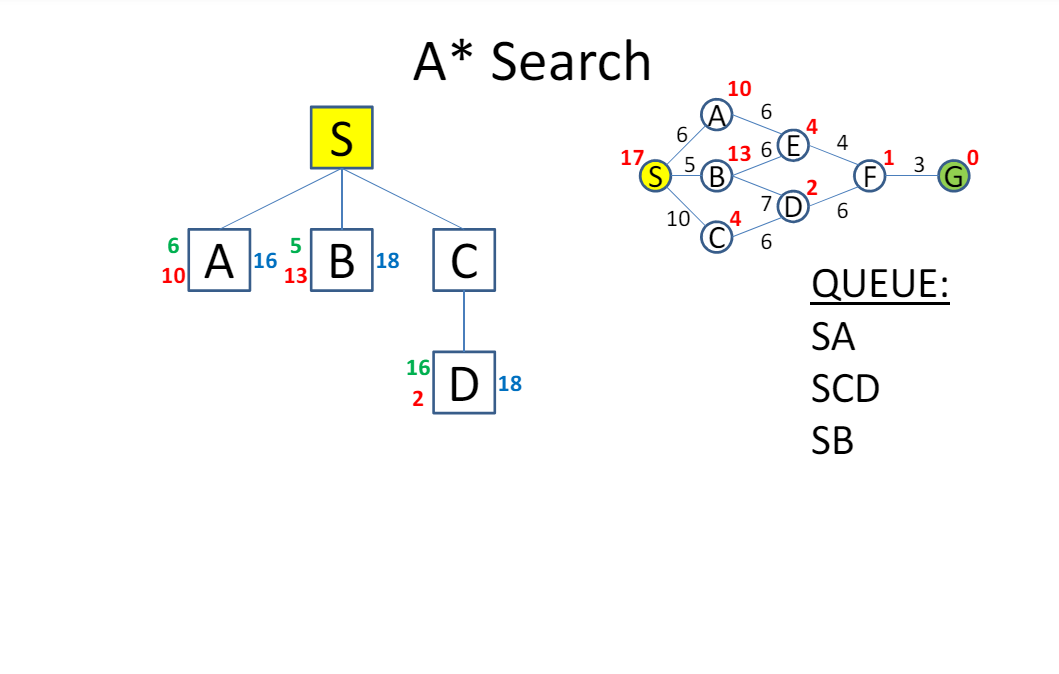

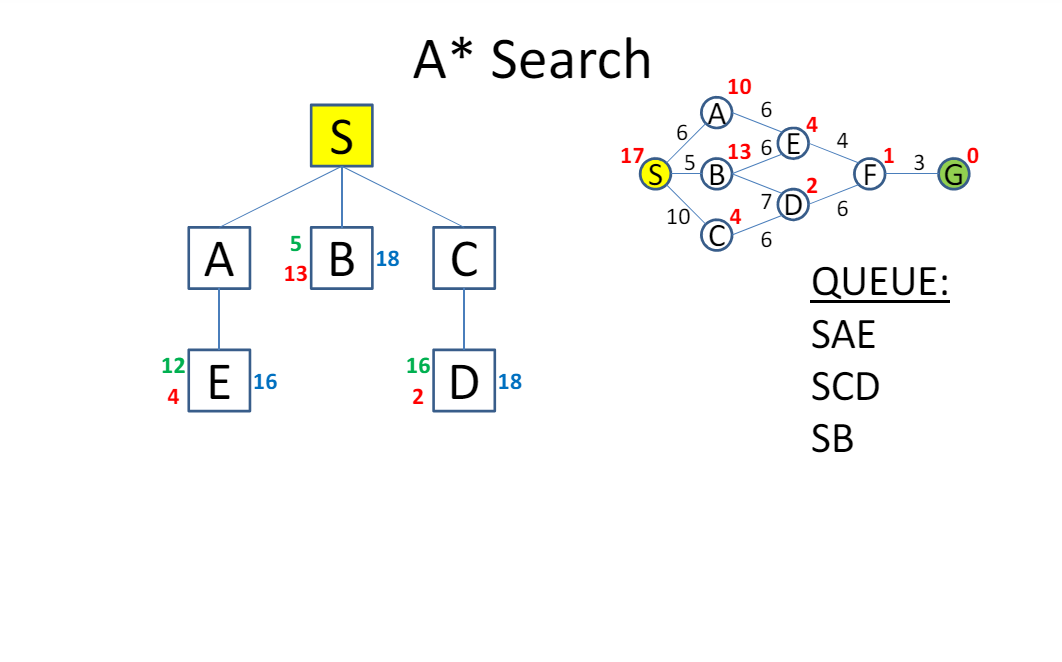

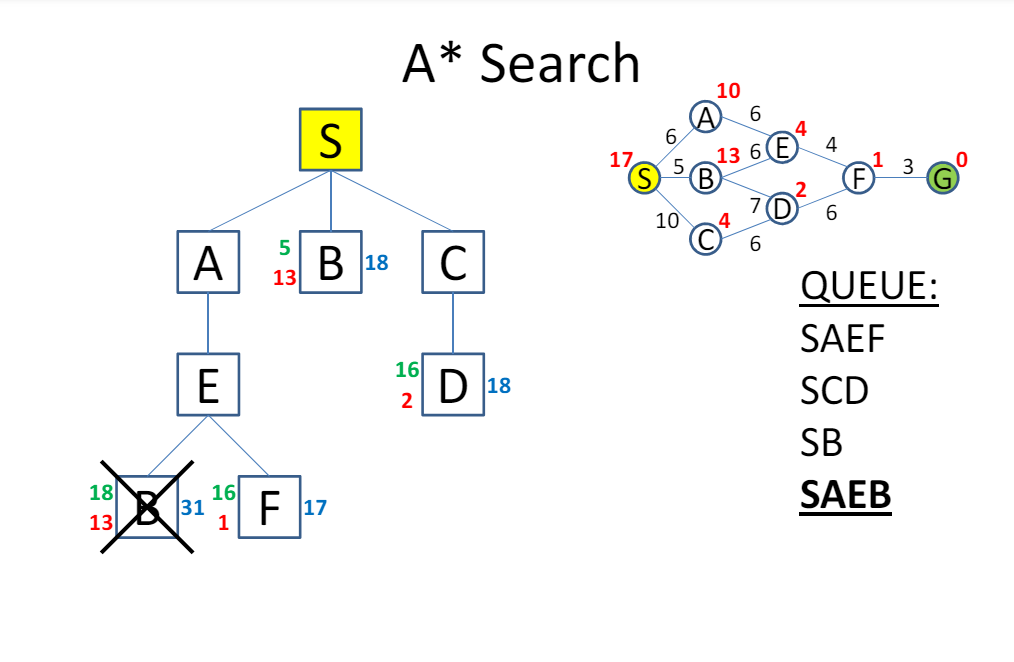

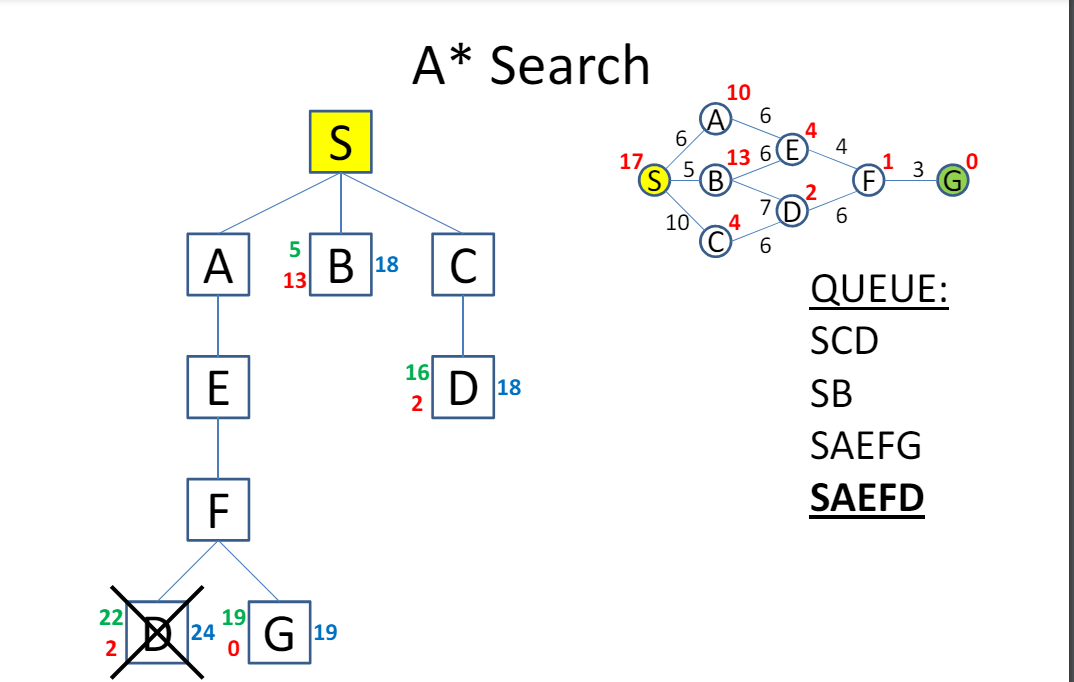

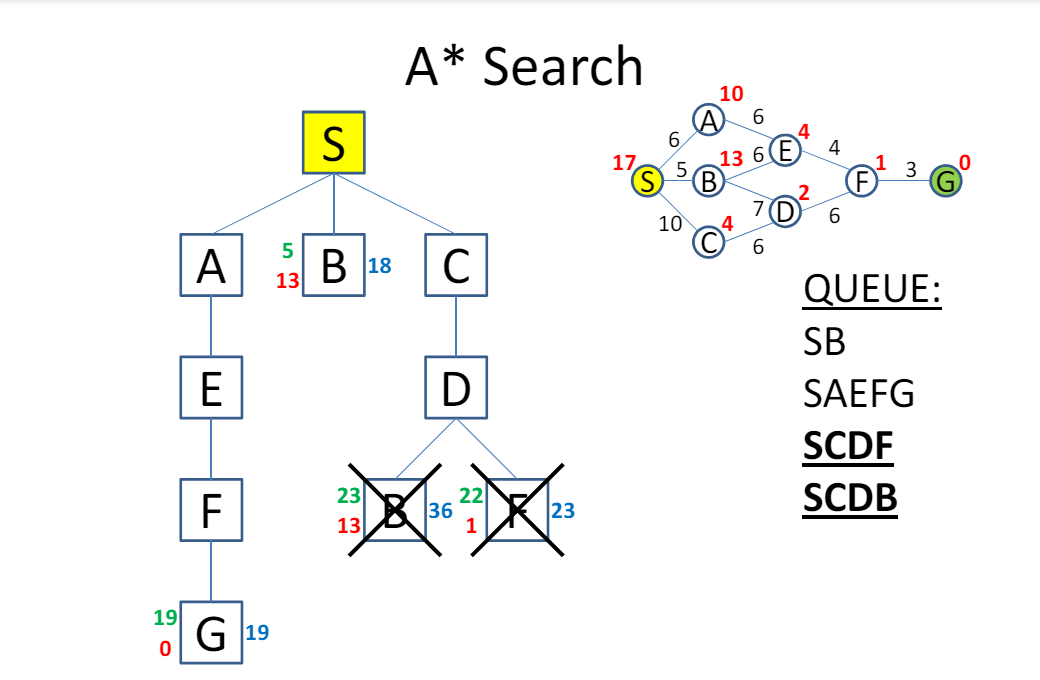

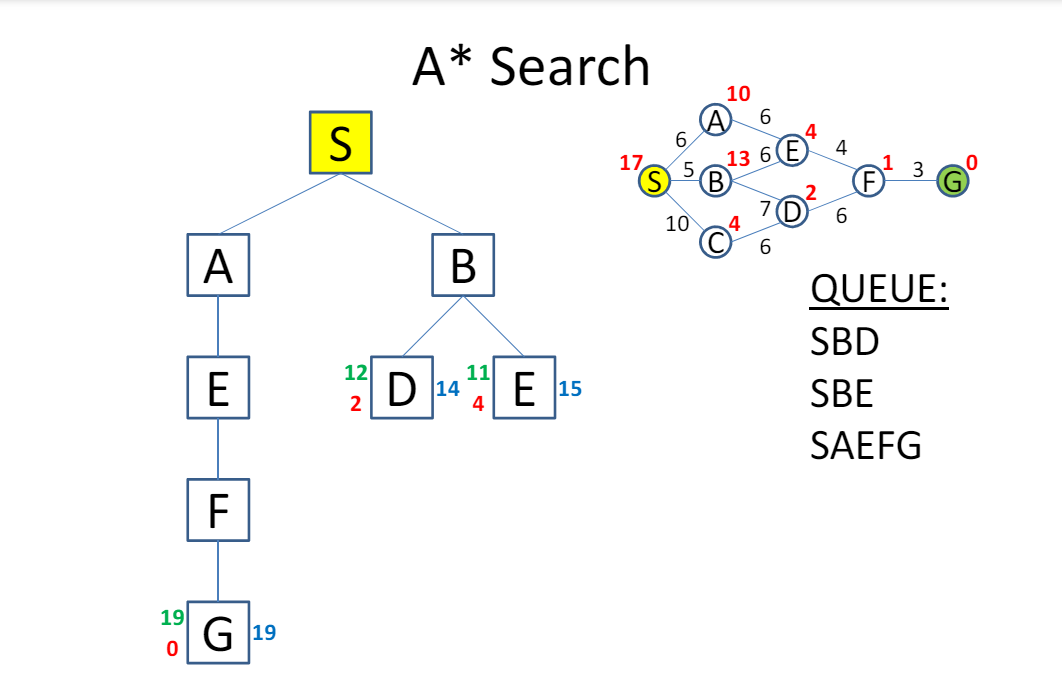

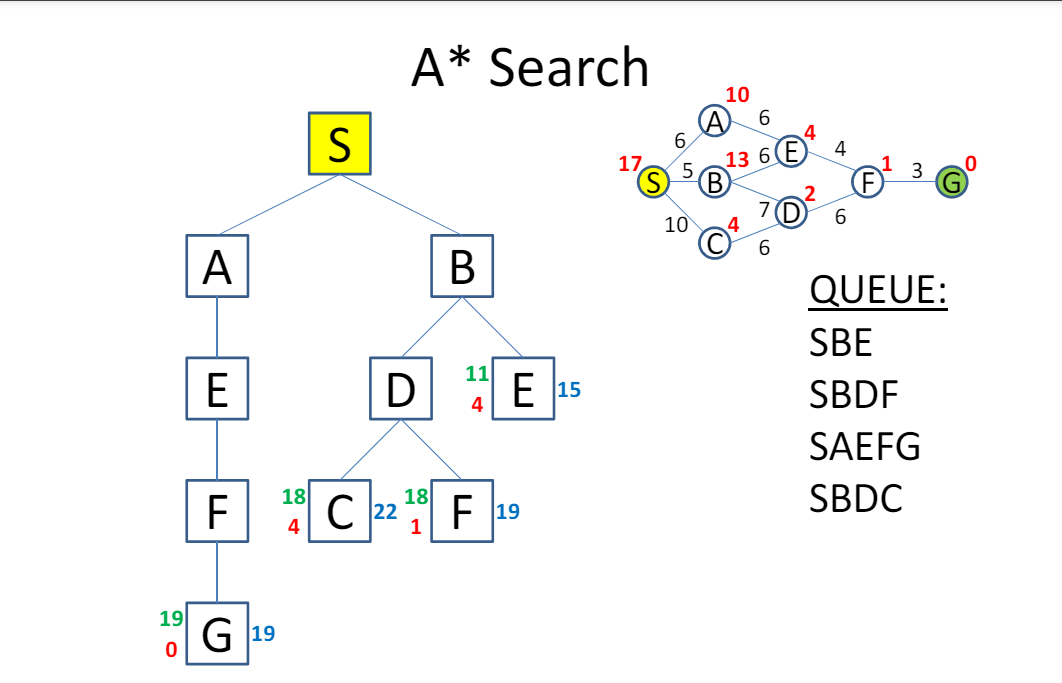

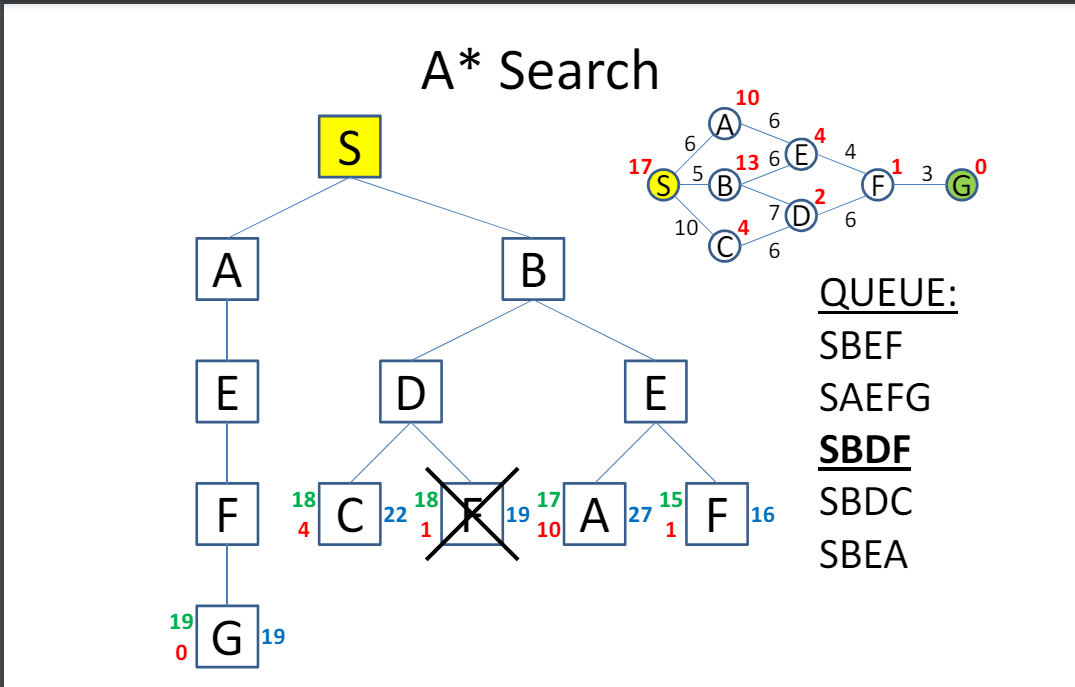

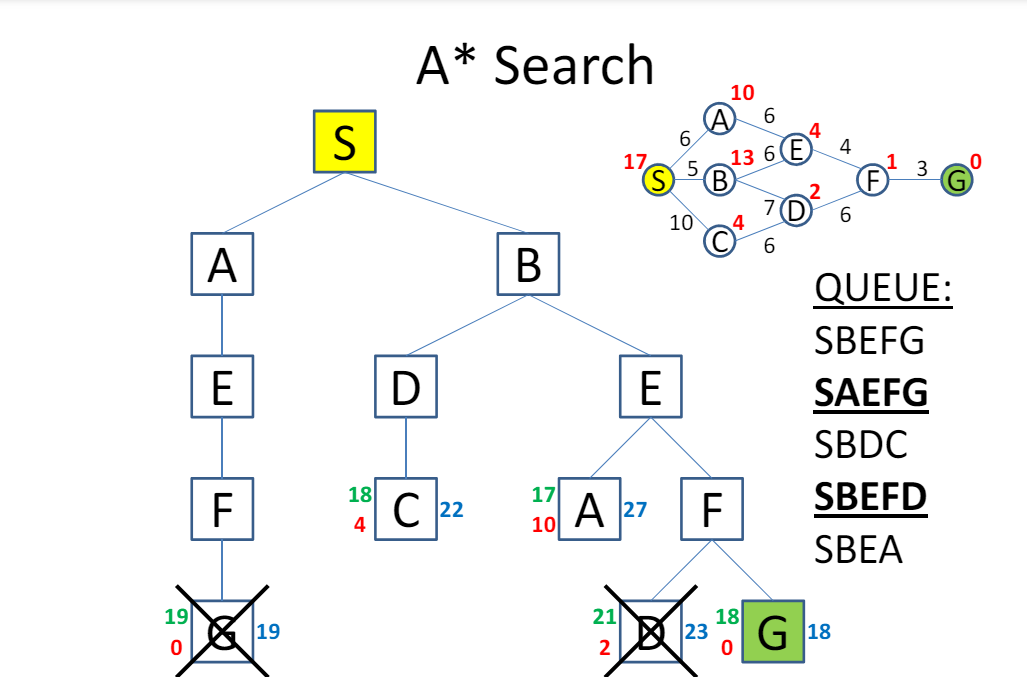

In [126]:
adjacency_list = {
    'S': [('A', 6),('C',10),('B',5)],
    'A': [('S', 6),('E', 6)],
    'B': [('E',6),('S',5),('D',7)],
    'C': [('D', 6)],
    'D': [('F', 6),('B',7)],
    'E': [('F', 4)],
    'G': [('F', 3)],
    'F': [('G', 3)]




}
heuristics = {'S': 17, 'A': 10, 'B': 13, 'C': 4,'D':2,'E':4,'F':1, 'G': 0}

graph1 = AStar(adjacency_list, heuristics)
path = graph1.apply_a_star(start='S', stop='G')


Path
S -> B -> E -> F -> G
Cost
0 -> 5 -> 11 -> 15 -> 18


### **CSP**

In [ ]:
pip install simpleai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleai: filename=simpleai-0.8.3-py3-none-any.whl size=100985 sha256=1f71f6bdf9555cfbd082dfe9fb42f72d67fff21cf9a10bebab09f58f760f8f26
  Stored in directory: /root/.cache/pip/wheels/91/0c/38/421d7910e7bc59b97fc54f490808bdb1097607d83d1a592865
Successfully built simpleai


In [ ]:
from simpleai.search import CspProblem, backtrack
def constraint_func(variables, values):
    for i in range(1, len(values)):
      if( values[0] == values[i]):
        return 0
    return 1

First let's define the domains' name and color

In [ ]:

colors=["Red","Green",'Blue',"Gray"]
domains_name=['Mark','Steve','Julia','Amanda','Allan','Michelle','Joanne','Derek','Kelly','Brian','Chris']


In [ ]:
domains={}
for i in range(len(domains_name)):
  domains[domains_name[i]]=colors


In [ ]:
domains

{'Mark': ['Red', 'Green', 'Blue', 'Gray'],
 'Steve': ['Red', 'Green', 'Blue', 'Gray'],
 'Julia': ['Red', 'Green', 'Blue', 'Gray'],
 'Amanda': ['Red', 'Green', 'Blue', 'Gray'],
 'Allan': ['Red', 'Green', 'Blue', 'Gray'],
 'Michelle': ['Red', 'Green', 'Blue', 'Gray'],
 'Joanne': ['Red', 'Green', 'Blue', 'Gray'],
 'Derek': ['Red', 'Green', 'Blue', 'Gray'],
 'Kelly': ['Red', 'Green', 'Blue', 'Gray'],
 'Brian': ['Red', 'Green', 'Blue', 'Gray'],
 'Chris': ['Red', 'Green', 'Blue', 'Gray']}

Now let's assign the constraints

In [ ]:

constraints = [
    (('Mark', 'Julia', 'Steve'), constraint_func),
    (('Julia', 'Mark', 'Steve','Amanda', 'Derek', 'Brian'), constraint_func),
    (('Brian', 'Julia', 'Kelly','Derek'), constraint_func),
    (('Steve', 'Mark', 'Amanda','Michelle', 'Allan'), constraint_func),
    (('Amanda', 'Steve', 'Mark','Julia', 'Derek', 'Michelle', 'Joanne'), constraint_func),
    (('Derek', 'Amanda', 'Julia','Brian', 'Kelly', 'Joanne', 'Chris'), constraint_func),
    (('Kelly', 'Derek', 'Brian','Chris'), constraint_func),
    (('Allan', 'Steve', 'Michelle'), constraint_func),
    (('Michelle', 'Allan', 'Steve','Amanda', 'Joanne'), constraint_func),
    (('Joanne', 'Michelle', 'Derek','Amanda', 'Chris'), constraint_func),
    (('Chris', 'Joanne', 'Derek','Kelly'), constraint_func),
]


In [ ]:
# Create the CSP problem
problem = CspProblem(domains_name, domains, constraints)

# Solve using backtracking search
solution = backtrack(problem)

# Print the solution
if solution:
    print("Solution found:")
    for var, value in solution.items():
        print(f"{var}: {value}")
else:
    print("No solution found.")

No solution found.


The backtracking algorithm is a depth-first search algorithm that methodically investigates the search space of potential solutions up until a solution is discovered that satisfies all the restrictions. The method begins by choosing a variable and giving it a value before repeatedly attempting to give values to the other variables. The method returns to the prior variable and tries a different value if at any time a variable cannot be given a value that fulfills the requirements. Once all assignments have been tried or a solution that satisfies all constraints has been discovered, the algorithm ends.

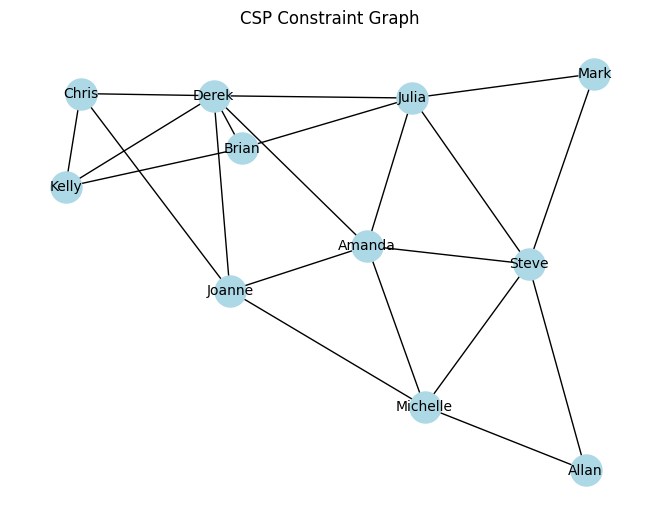

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the nodes (people)
nodes = ['Mark', 'Julia', 'Steve', 'Michelle', 'Allan', 'Amanda', 'Brian', 'Derek', 'Kelly', 'Chris', 'Joanne']

# Define the edges (constraints) based on your provided constraints
edges = [
    ('Mark', 'Julia'),
    ('Steve', 'Mark'),
    ('Steve', 'Julia'),
    ('Steve', 'Michelle'),
    ('Steve', 'Allan'),
    ('Steve', 'Amanda'),
    ('Julia', 'Brian'),
    ('Julia', 'Amanda'),
    ('Julia', 'Derek'),
    ('Brian', 'Derek'),
    ('Brian', 'Kelly'),
    ('Kelly', 'Chris'),
    ('Kelly', 'Derek'),
    ('Chris', 'Derek'),
    ('Chris', 'Joanne'),
    ('Joanne', 'Derek'),
    ('Joanne', 'Amanda'),
    ('Joanne', 'Michelle'),
    ('Michelle', 'Steve'),
    ('Michelle', 'Allan'),
    ('Amanda','Michelle'),
    ('Amanda','Derek'),

]

# Create the graph
graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

# Draw the graph
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black')
plt.title('CSP Constraint Graph')
plt.show()